# Probability and Statistics

## Statistics fundamentals


![title](imagenes/sampling_1.png)

![title](imagenes/sampling_2.png)

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

These problems can be solved by sampling from the population that interests us. Although not as good as working with the entire population, working with a sample is the next best thing we can do.

When we sample, the data we get might be more or less similar to the data in the population. For instance, let's say we know that the average salary in our company is $34500, and the proportion of women is 60\%. We take two samples and find these results:

![title](imagenes/sampling_error.png)

As you can see, the metrics of the two samples are different than the metrics of the population. A sample is by definition an incomplete set of data for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. This difference can be seen as an error, and because it's the result of sampling, it's called sampling error.

**A metric specific to a population is called a parameter, while one specific to a sample is called a statistic**. In our example above, the average salary of all the employees is a parameter because it's a metric that describes the entire population. The average salaries from our two samples are examples of statistics because they only describe the samples.

Another way to think of the concept of the sampling error is as the difference between a parameter and a statistic:

*Sampling error = parameter - statistics*

At this point in the mission, we'll move from the tech company example to working with a real world data set. Our first challenge will be to measure sampling error using this data set.

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from Kaggle, where you can also find useful documentation for the data set.


In [1]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')

print(wnba.head())
print(wnba.tail())
print(wnba.shape)


              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0  

### Sampling

In [2]:
parameter = wnba['Games Played'].max()

sample = wnba['Games Played'].sample(30, random_state = 1)

statistic = sample.max()

sampling_error = parameter - statistic

Tomando multiples samples de la serie PTS (puntos) para comparar con el valor real de la población

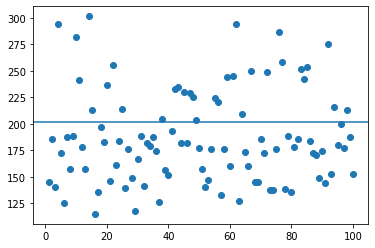

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')

mean_of_samples = []

for iterator in range(100) :    
    mean_of_samples.append(wnba['PTS'].sample(10, random_state = iterator).mean())
    
    
plt.scatter(range(1,101), mean_of_samples)
plt.axhline(wnba['PTS'].mean())


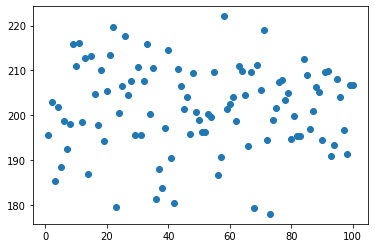

In [4]:
mean_of_samples = []
for iterator in range(100) :    
    mean_of_samples.append(wnba['PTS'].sample(100, random_state = iterator).mean())
    
plt.scatter(range(1,101), mean_of_samples)

#### Stratified sampling

Consiste en hacer sampling teniendo en cuenta las proporciones reales de la población.

No es lo mismo el número de puntos marcados de un jugador a otro si uno juega 90 minutos y otro 1.

Ó según la posición en la que juega.

In [5]:
wnba['Pts_per_game'] = round(wnba['PTS']/wnba['Games Played'],1)

wnba_grouped = wnba.groupby('Pos')

Forward = wnba_grouped.get_group('F')
Guard = wnba_grouped.get_group('G')
Center = wnba_grouped.get_group('C')
Guard_forward = wnba_grouped.get_group('G/F')
Forward_center = wnba_grouped.get_group('F/C')

strata = [(Forward, 'F'), (Guard, 'G'), (Center, 'C'), (Guard_forward, 'G/F'), (Forward_center, 'F/C')]

mean_points_position = {}

for stratum, position in strata:
    mean_points_position[position] = stratum['Pts_per_game'].sample(10, random_state = 0).mean()

position_most_points = max(mean_points_position, key=mean_points_position.get)    

otra forma de hacer lo mismo

In [6]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

#### Stratified proportional
No es preciso hacer sampling simplemente para sacar el número medio de puntos. Está muy correlacionado con el número de partidos jugados, y si el sample coge jugadores con pocos partidos saldrá una media de puntos muy baja.

Por eso se puede sacar el porcentaje de jugadores según el númeor de partidos jugados separando en rangos y hacer un sampling proporcional.

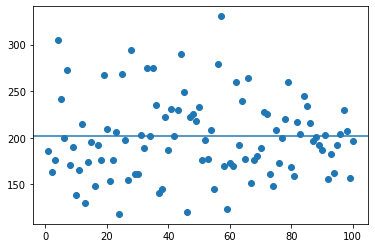

In [7]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

No parece que mejore mucho respecto a hacer el sampling normal en evz del stratified sampling.

Esto es porque el número de partidos jugados en realidad no se correlaciona tan bien con el número de puntos. Puedes jugar un minuto en muchos partidos. Una mejor forma es estratificar por **minutos jugados**

In [8]:
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

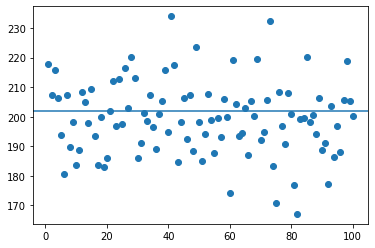

In [9]:
less_348 = wnba[wnba.MIN <= 347]
less_684_more_347 = wnba[(wnba.MIN > 347) & (wnba.MIN <=683)]
more_683 = wnba[wnba.MIN > 683]

proportional_sampling_means = []

for iterator in range(100):
    sample_less_348 = less_348['PTS'].sample(9, random_state = iterator)
    sample_less_684_more_347 = less_684_more_347['PTS'].sample(10, random_state = iterator)
    sample_more_683 = more_683['PTS'].sample(8, random_state = iterator)
    
    final_sample = pd.concat([sample_less_348, sample_less_684_more_347, sample_more_683])
    proportional_sampling_means.append(final_sample.mean())
    
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

Here are a few guidelines for choosing good strata:

**1. Minimize the variability within each stratum.**

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need a more granular stratification (need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

**2. Maximize the variability between strata.**

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. In the previous screen, stratifying the data by games played resulted in strata that weren't too different from each other with respect to the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

**3. The stratification criterion should be strongly correlated with the property you're trying to measure.**

For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure). We've covered briefly the concept of correlation in the pandas courses, and we'll cover it again later in these statistics courses, so don't worry if the concept of correlation doesn't make much sense to you now.

#### Clustering

The data set we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each requiring its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are a lot of websites out there that can help with data collection, but how can you go about it so that you can spend one day or two on getting the data you need, rather than one month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

___



Cuando tenemos datos de muchas fuentes diferentes y seleccionamos unas fuentes y no otras para nuestros muestreos.
Por ejemplo, la página de cada uno de los distintos equipos. Cada equipo podría ser un cluster que contiene jugadoras.

![title](imagenes/clusters.png)

In [10]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

                                        
sample = pd.DataFrame()                 

                                        
for cluster in clusters:
    data_collected = (wnba[wnba['Team'] == cluster])
    sample = sample.append(data_collected)
        

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)
    

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934


So far, we've explored a few scenarios where sampling can be useful. There are more situations, however, where a data scientist can use sampling, and we discuss a few in this section.

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows, and perform your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. It could be that you need to collect data from an API that either has a usage limit, or is not free. In this case, you are more or less forced to sample. Knowing how and what to sample can be of great use.

Another common use case of sampling is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we've discussed in the previous screen, cluster sampling would be a great choice in such a scenario.

Sampling is a vast topic in statistics, and there are other sampling methods besides what we've discussed so far in our course. Here's a good starting point to read about other potentially useful sampling methods.

## Variables in statistics

![title](imagenes/quantitative_qualitative.png)

La cantidad de información que da una variable depende de su naturaleza y de la manera en la que se mide.

El sistema de reglas que define cómo se mide cada variable es el **scale of measurement** ó **level of measurement**:

**Escalas de medida:**
nominal, ordinal, interval, and ratio

Sus características dependen de:
- Can we tell whether two individuals are different?
- Can we tell the direction of the difference?
- Can we tell the size of the difference?



#### Nominal  scale
- We can tell whether two individuals are different or not (with respect to that variable).
- We can't say anything about the direction and the size of the difference.
- We know that it can only describe qualities.

#### Ordinal scale

Podemos ver la dirección de la diferencia pero no cuánta es

![title](imagenes/ordinal_scale.png)

#### Interval and ratio scale
Utilizando números reales conocemos la dirección y la diferencia.

![title](imagenes/interval_ratio_scale.png)



![title](imagenes/scales.png)

 #### Lo que diferencia ratio e interval es la naturaleza del **punto cero**:

En ratio significa que no hay cantidad - > 0 gramos, no pesa

En intervalo significa la presencia de algo - > una variable de intervalos sería la diferencia con la media. El 0 sería una medida igual que la media.

Otra diferencia es la forma de medir la diferencia entre los datos.

En una ratio scale se cuantifica la diferencia de dos maneras:

- la resta de dos puntos
- la diferencia en térmimos de *ratio*, uno entre el otro.

Se puede decir que alguien pesa el doble que otro con la variable de escala ratio, pero no se puede decir que alguien pesa el doble con la variable de escala de intervalo si el valor de una es el doble que otra. 


![title](imagenes/ratio_interval.png)

#### Interval

Son las más raras. Se usan por ejemplo e fechas y en temperaturas en Celsius y fahrenheit. En ellas el cero no indica ausencia de temperatura.

Sin embargo, en Kelvin el cero sí que indica ausenncia de energía. No está puesto de manera arbitraria. or lo que mide la temperatura en ratio.

![title](imagenes/temperature.png)

##### Variables:

- Qualitative
- Quantitative
    - Ordinal
    - Interval
    - Ratio

### Frequency Distributions

In [11]:
import pandas as pd

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

wnba = pd.read_csv('wnba.csv')

wnba.shape

(143, 32)

In [12]:
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63.0,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
7,Allie Quigley,CHI,G,178,64.0,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
8,Allisha Gray,DAL,G,185,76.0,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
9,Allison Hightower,WAS,G,178,77.0,24.302487,US,"June 4, 1988",29,LSU,5,7,103,14,38,36.8,2,11,18.2,6,6,100.0,3,7,10,10,5,0,2,36,0,0


Se pueden generar tablas de frecuencia con series.value_counts()

In [13]:
freq_distro_pos = wnba['Pos'].value_counts()
freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [14]:
freq_distro_height = wnba['Height'].value_counts()
freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

Las tablas de frecuencia ordena según el númeor de apariciones.

Esto da igual en variables Nominales, pero en el resto sí que puede dificultar la visualización.

Por ejemplo mirar cómo ordena las alturas en la celda anterior.

#### ordenar variables con ratio scale

In [15]:
age_ascending = wnba['Age'].value_counts().sort_index(ascending = True)
age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [16]:
age_descending = wnba['Age'].value_counts().sort_index(ascending = False)
age_descending

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

#### Ordenar variables ordinales

Si hacemos sort se ordenarían alfabéticamente.

|      Condition      |           Label          |   |   |   |   |   |   |   |   |
|:-------------------:|:------------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| points <= 20        | very few points          |   |   |   |   |   |   |   |   |
| 20 < points <= 80   | few points               |   |   |   |   |   |   |   |   |
| 80 < points <= 150  | many, but below average  |   |   |   |   |   |   |   |   |
| 150 < points <= 300 | average number of points |   |   |   |   |   |   |   |   |
| 300 < points <= 450 | more than average        |   |   |   |   |   |   |   |   |
| points > 450        | much more than average   |   |   |   |   |   |   |   |   |

In [17]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

In [18]:
wnba['PTS_ordinal_scale'].value_counts()


average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [19]:
# pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts()[['5','1','2','0','3','4']] 
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[['4','3','0','2','1','5']]
pts_ordinal_desc


much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

#### Frecuencias con proporciones y porcentajes

Hasta ahora eran siempre frecuencias absolutas.

Podríamos hacer:

In [20]:
print(wnba['Pos'].value_counts() / len(wnba))

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


pero value_counts ya viene con un parámetro para sacar proporciones:

In [21]:
print(wnba['Pos'].value_counts(normalize = True))

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


In [22]:
print(wnba['Pos'].value_counts(normalize = True) * 100)

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64


In [23]:
age_sort_prop = (wnba['Age'].value_counts(normalize = True)).sort_index()

age_sort_perc = (wnba['Age'].value_counts(normalize = True)*100).sort_index()

proportion_25 = age_sort_prop[25]

percentage_30 = age_sort_perc[30]

percentage_over_30 = age_sort_perc.loc[30:].sum()

percentage_below_23 = age_sort_perc.loc[:23].sum()

#### Percentile rank

El rango percentil de un valor *x* en una distribución de frecuencia es el porcentaje de valores que son iguales o menores que *x* en la distribución. 


*Percentil*: valor de la variable

*Rango Percentil*:  el porcentaje de valores que están por debajo de ese percentil



![title](imagenes/percentil.png)

In [24]:
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


kind = 'weak' to indicate that we want to find the percentage of values thar are equal to or less than the value we specify in the score parameter.

Para encontrar valores fuera del percentil:

In [25]:
print(100 - percentileofscore(wnba['Age'], 29, kind = 'weak'))

26.573426573426573


In [26]:
percentile_rank_half_less = percentileofscore(wnba['Games Played'], score = 17 , kind = 'weak')
percentile_rank_half_less

16.083916083916083

In [27]:
percentage_half_more = 100 - percentile_rank_half_less
percentage_half_more

83.91608391608392

#### Más sobre percentiles

Se pueden sacar los percentiles con la función series.describe()
Por defecto salen 25, 50 y 75

In [28]:
print(wnba['Age'].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


Para elegir los rangos percentiles se puede hacer así:

In [29]:
percentiles = wnba['Age'].describe([0.75, 0.5, 0.95]).iloc[3:]

print(percentiles)

min    21.0
50%    27.0
75%    30.0
95%    34.0
max    36.0
Name: Age, dtype: float64


In [30]:
age_upper_quartile = percentiles[2]

age_middle_quartile = percentiles[1]

age_95th_percentile = percentiles[3]

#### Transformar cantidades incomprensibles de datos

NO todas las tablas de frecuencia son ilustrativas:

In [31]:
print(wnba['Weight'].value_counts().sort_index())

55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: Weight, dtype: int64


Por eso a veces hay que repartir los datos en intervalos.

Esto se consigue fácilmente con:

In [32]:
print(wnba['Weight'].value_counts(bins = 10).sort_index())

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64


In [33]:
grouped_freq_table = wnba['PTS'].value_counts(normalize = True, bins = 10).sort_index(ascending = False)*100
print(grouped_freq_table)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


Hay una contrapartida entre la información y la comprensibilidad:

![title](imagenes/intervals.png)

In [34]:
print(wnba['MIN'].value_counts(bins=3).sort_index(ascending = True))

(10.993, 347.333]     48
(347.333, 682.667]    50
(682.667, 1018.0]     45
Name: MIN, dtype: int64


In [35]:
print(wnba['MIN'].value_counts(bins=10).sort_index(ascending = True))

(10.993, 112.6]    19
(112.6, 213.2]     10
(213.2, 313.8]     17
(313.8, 414.4]     15
(414.4, 515.0]     13
(515.0, 615.6]     12
(615.6, 716.2]     15
(716.2, 816.8]     14
(816.8, 917.4]     19
(917.4, 1018.0]     9
Name: MIN, dtype: int64


In [36]:
print(wnba['MIN'].value_counts(bins=20).sort_index(ascending = True))

(10.993, 62.3]     12
(62.3, 112.6]       7
(112.6, 162.9]      6
(162.9, 213.2]      4
(213.2, 263.5]     11
(263.5, 313.8]      6
(313.8, 364.1]      6
(364.1, 414.4]      9
(414.4, 464.7]      6
(464.7, 515.0]      7
(515.0, 565.3]      4
(565.3, 615.6]      8
(615.6, 665.9]      7
(665.9, 716.2]      8
(716.2, 766.5]     10
(766.5, 816.8]      4
(816.8, 867.1]     12
(867.1, 917.4]      7
(917.4, 967.7]      7
(967.7, 1018.0]     2
Name: MIN, dtype: int64


#### Grouped frequency tables

Los intervalos salen en un formato que no es aceptable, ya que los puntos deben ser números enteros y no decimales.

Para solucionarlo se pueden generar intervalos a mano y luego clasificar los valores de la serie a segmentar con un for.

In [37]:
intervals = pd.interval_range(start=0, end=600, freq = 60)
intervals

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 360], (360, 420], (420, 480], (480, 540], (540, 600]],
              closed='right',
              dtype='interval[int64]')

In [38]:
gr_freq_table_10 = pd.Series([0,0,0,0,0,0,0,0,0,0],index = intervals)
gr_freq_table_10

(0, 60]       0
(60, 120]     0
(120, 180]    0
(180, 240]    0
(240, 300]    0
(300, 360]    0
(360, 420]    0
(420, 480]    0
(480, 540]    0
(540, 600]    0
dtype: int64

In [39]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

### Visualizing frequency distributions

![title](imagenes/variables_graficos.png)

#### Bar charts

Para variables en escala nominal y ordinal es común visualizar con bar plots. Para un bar plot se necesita:
- Un set que ontiene los valores únicos.
- Un set con lafrecuencia de cada valor único.

In [40]:
def make_exp_ordinal(row):
    if row['Experience'] == 'R':
        return 'Rookie'
    if (1 <= int(row['Experience']) <=  3):
        return 'Little experience'
    if (4 <= int(row['Experience']) <=  5):
        return 'Experienced'
    if (5 < int(row['Experience']) <= 10):
        return 'Very experienced'
    else:
        return 'Veteran'
    
    
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)

In [41]:
wnba['Exp_ordinal']

0      Little experience
1                Veteran
2            Experienced
3       Very experienced
4                 Rookie
5                 Rookie
6                 Rookie
7       Very experienced
8      Little experience
9            Experienced
10      Very experienced
11     Little experience
12     Little experience
13     Little experience
14      Very experienced
15     Little experience
16     Little experience
17     Little experience
18                Rookie
19     Little experience
20           Experienced
21                Rookie
22      Very experienced
23                Rookie
24     Little experience
25           Experienced
26      Very experienced
27               Veteran
28      Very experienced
29               Veteran
30               Veteran
31      Very experienced
32     Little experience
33     Little experience
34     Little experience
35           Experienced
36      Very experienced
37      Very experienced
38     Little experience
39      Very experienced


Para ordenarlos de manera lógica de menor a mayor experiencia solo se puede hacer a mano.

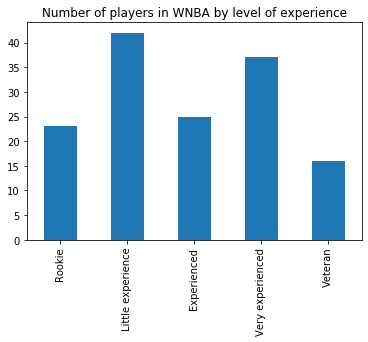

In [42]:
freq_table = wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]]

freq_table.plot.bar(title = 'Number of players in WNBA by level of experience')


Se pueden girar los ticks para mejorar la legibilidad:

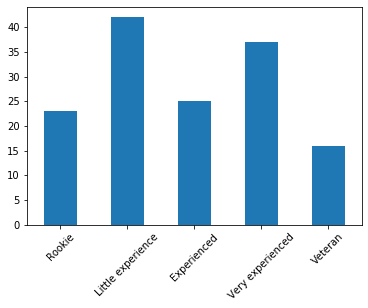

In [43]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)

Para utilizar barras horizontales en vez de vericales:

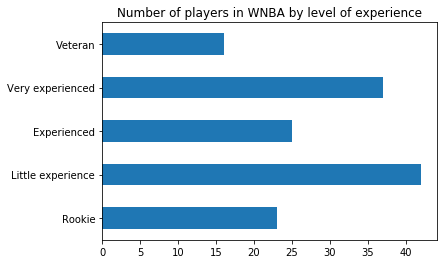

In [44]:
freq_table.plot.barh(title = 'Number of players in WNBA by level of experience')

#### Pie charts

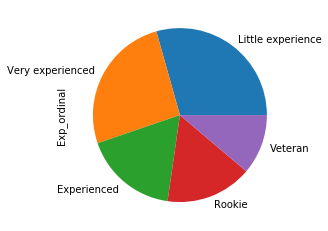

In [45]:
freq_table_exp_pie = wnba['Exp_ordinal'].value_counts()
freq_table_exp_pie.plot.pie()

El aspecto de la pie es mejorable.

Documentación sobre el formateo de strings:

https://docs.python.org/3/library/string.html#format-specification-mini-language

![title](imagenes/string_format.png)

Text(0, 0.5, '')

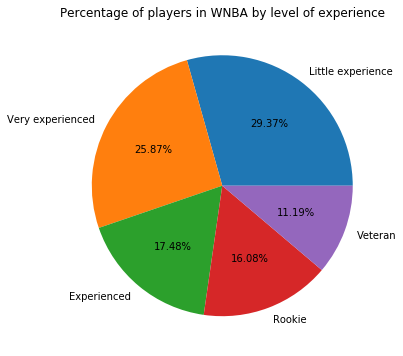

In [46]:
freq_table_exp_pie.plot.pie(figsize = (6,6), autopct = '%.2f%%', title = 'Percentage of players in WNBA by level of experience')

import matplotlib.pyplot as plt
# para quitar la etiqueta de exp_ordinal del eje y
plt.ylabel('')

#### Histograms
Las variables medidas en interval y ratio scales tienen propiedades que permiten visualizarlas en modos más elaborados.

Un histograma es la forma visual de una tabla de frecuencia agrupada. la principal diferencia con el bar plot es que no hay huecos entre barras porque cada una representa un inetrvalo y no un único valor.


In [47]:
print(wnba['PTS'].describe())

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64


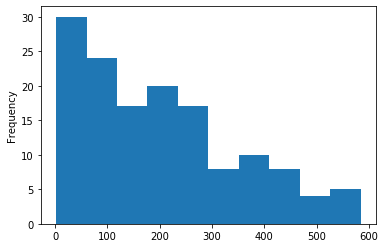

In [48]:
wnba['PTS'].plot.hist()

Under the hood, the wnba['PTS'].plot.hist() method:

- Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

In [49]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


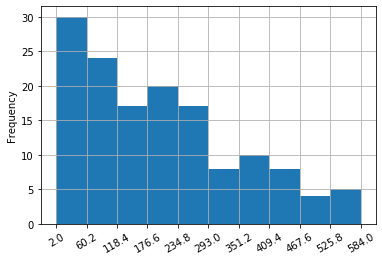

In [50]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

In [51]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

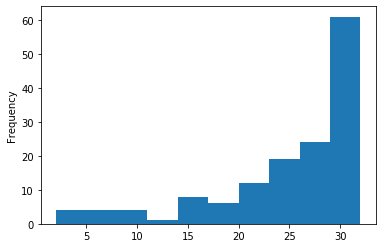

In [52]:
wnba['Games Played'].plot.hist()

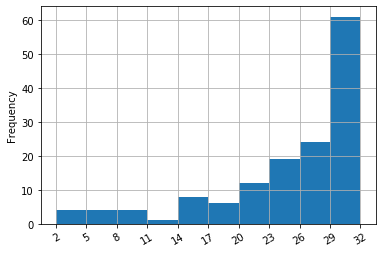

In [53]:
wnba['Games Played'].plot.hist(grid = True, xticks = arange(2,33,3), rot = 30)

#### Cambiar los intervalos del histograma

Otra forma mejor de cambiar los intervalos.


We'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

- We start with specifying the range of the entire distribution using the range parameter of Series.plot.hist().

- Then we combine that with the number of bins to get the intervals we want.

Let's say we want to get these three intervals for the distribution of the PTS variable:

- [1, 200)
- [200, 400)
- [400, 600]

If the histogram ranges from 1 to 600, and we specify that we want three bins, then the bins will automatically take the intervals above. This is because the bins must have equal interval lengths, and, at the same time, cover together the entire range between 1 and 600. To cover a range of 600 with three bins, we need each bin to cover 200 points, with the first bin starting at 1, and the last bin ending at 600.


![title](imagenes/rangos_histograma.png)



Text(0.5, 0, 'Games played')

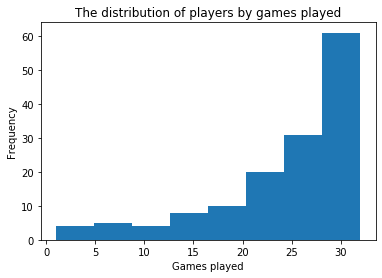

In [54]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8, title = 'The distribution of players by games played')
plt.xlabel('Games played')

#### Formas de los histogramas

![title](imagenes/histogram_shape.png)

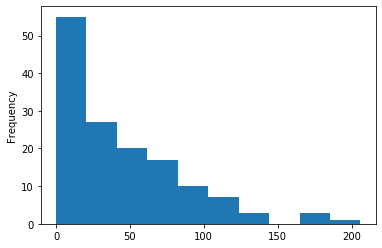

In [55]:
wnba['AST'].plot.hist()

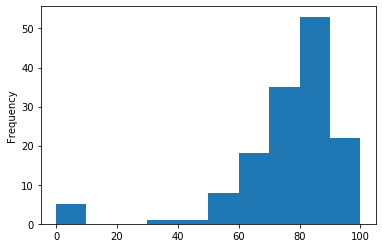

In [56]:
wnba['FT%'].plot.hist()

#### Distribución normal o gaussiana

Corresponde con un histograma simétrico.

En general nada es simétrico, pero es común utilizar distribuciones perfectamente simétricas como base para describir las distribuciones que se encuentran en la práctica.

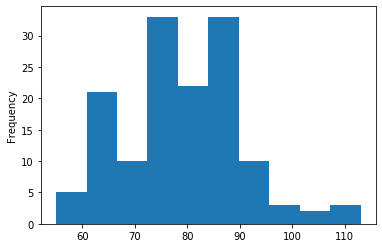

In [57]:
wnba['Weight'].plot.hist()

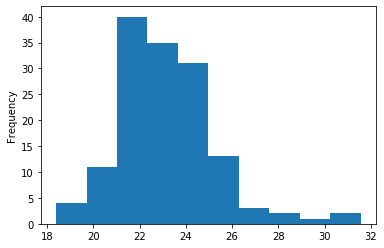

In [58]:
wnba['BMI'].plot.hist()

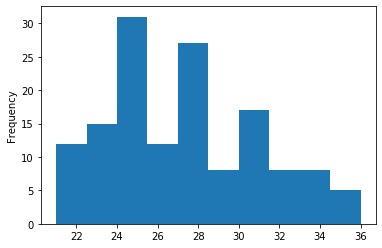

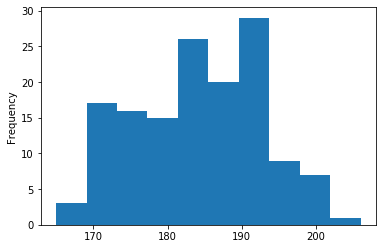

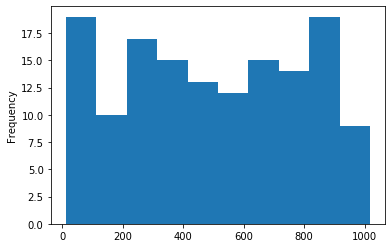

In [59]:
wnba['Age'].plot.hist()
plt.figure()
wnba['Height'].plot.hist()
plt.figure()
wnba['MIN'].plot.hist()

### Comparing frequency distributions

![title](imagenes/compare_distribution.png)

Tablas de frecuencia de posición de jugadora en función de su experiencia:

In [60]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

In [61]:
rookie_distro = rookies['Pos'].value_counts()

little_xp_distro = little_xp['Pos'].value_counts()

experienced_distro = experienced['Pos'].value_counts()

very_xp_distro = very_xp['Pos'].value_counts()

veteran_distro = veterans['Pos'].value_counts()

In [62]:
rookie_distro

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64

In [63]:
little_xp_distro

G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64

In [64]:
experienced_distro

G      9
F      6
C      6
F/C    2
G/F    2
Name: Pos, dtype: int64

In [65]:
very_xp_distro

G      16
C       6
F       6
G/F     5
F/C     4
Name: Pos, dtype: int64

In [66]:
veteran_distro

G      7
F      4
G/F    3
C      1
F/C    1
Name: Pos, dtype: int64

#### Grouped bar plots : Generar varias bar plots simultaneas

Utilizando seaborn
````
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba)
````

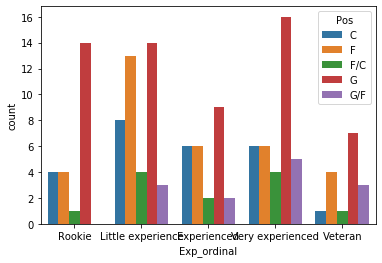

In [67]:
import seaborn as sns

sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba, order = ['Rookie','Little experience','Experienced','Very experienced','Veteran'], hue_order = ['C','F','F/C','G','G/F'])

#### Cómo se relacionan las edades con los minutos jugados

Primero segmentamos por edad creando variables ordinales.

Luego segmentamos por minutos jugados más o menos que la media.

In [68]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

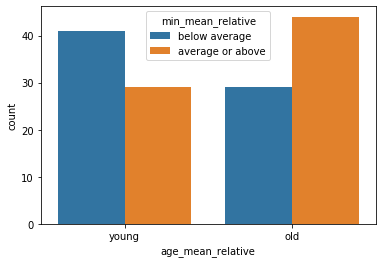

In [69]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

La variable minutos permite mucha más granularidad

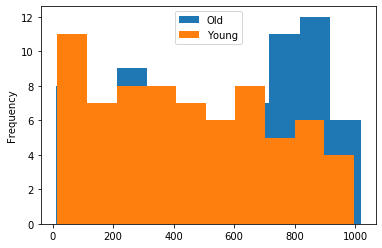

In [70]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

Con histtype = step dejamos solo el contorno del histograma para merjor visualización

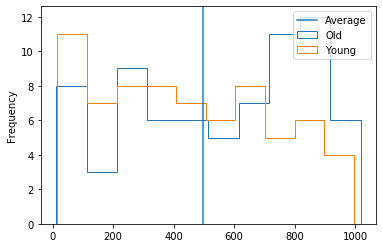

In [71]:
import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(x = 497, label='Average')
plt.legend()
plt.show()

#### Suavizar histogramas : Kernel Density Plot (KDE)

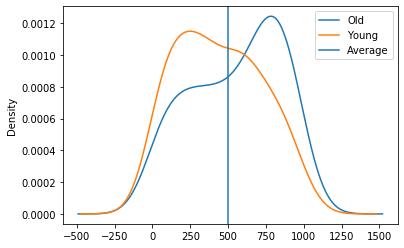

In [72]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)

wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

plt.axvline(x = 497, label='Average')

plt.legend()

plt.show()

Los plots de barras agrupadfos son ideales para variables medidas en escalas nominales y ordinales.

Para variables en ratio o interval, KDE es una buena solución para comparar distribuciones. Cuando hay demasiadas curvas es difícil de encontrar patrones.


#### Strip plot

Es un scatter plot. lo que pasa es que para variables ordinales y nominales toma la forma de strip plot

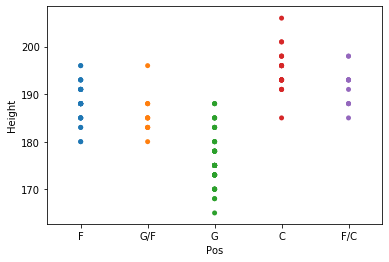

In [73]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = False)

Se puede ver que aquí la repeticiones de valores no se ven porque se superponen. Para eso se activa el parámetro Jitter

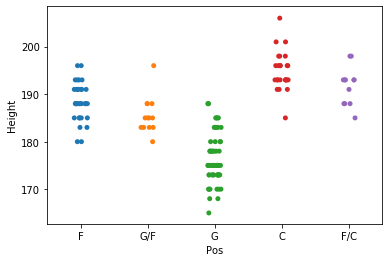

In [74]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

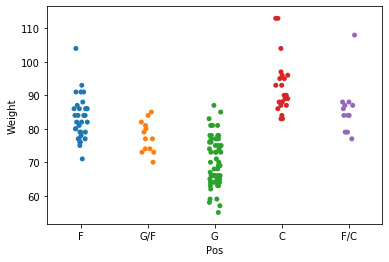

In [75]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
plt.show()

#### Box and Whisker / Box Plot

![title](imagenes/box_and_whisker.png)

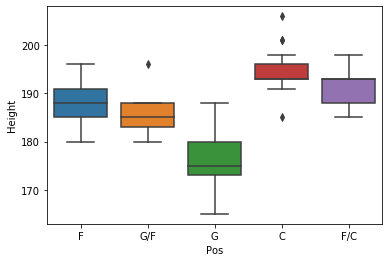

In [76]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

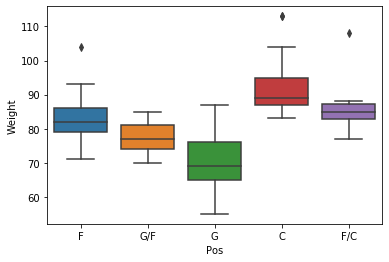

In [77]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

Los puntitos aislados representan los outliers:

A value is an outlier if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

Se puede cambiar este factor de 1.5 con el parámetro "whis"

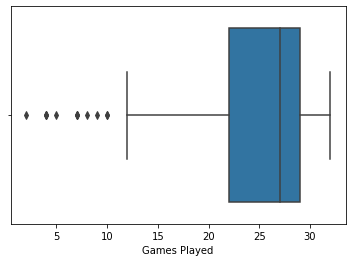

In [78]:
quartiles = wnba['Games Played'].describe()[3:]

iqr = quartiles[3] - quartiles[1]

lower_bound = quartiles[1] - 1.5*iqr
upper_bound = quartiles[3] + 1.5*iqr

outliers_low = sum(wnba['Games Played'] < lower_bound)


outliers_high = sum(wnba['Games Played'] > upper_bound)

sns.boxplot(wnba['Games Played'])
plt.show()

Tutorial for creating graphs with FiveThirtyEight style

https://www.dataquest.io/blog/making-538-plots/

## Intermediate Statistics: Averages and Variability

### The Mean

#### Arithmetic Mean

We should think of the mean as being the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean. 

In [79]:
distribution = [0,2,3,3,3,4,13]

mean = sum(distribution)/len(distribution)

center = False

d_pos = 0
d_neg = 0
for value in distribution:
    d = value - mean
    if d > 0:
        d_pos += d
    if d < 0:
        d_neg += d
        
equal_distances = True

Generando miles de distribuciones aleatorias de 10 números de 0 a 10 éstas deben estar a valores de distancia equivalentes por encima y por debajo de la media:

In [80]:
from numpy.random import randint, seed
import numpy as np
distributions = []

equal_distances = 0


for i in range(0, 5000):    
    np.random.seed(seed = i)
    distribution = randint(0, 1000, 10)
    distributions.append(distribution)
    mean = sum(distribution)/len(distribution)
    d_pos = 0
    d_neg = 0
    for value in distribution:
        d = value - mean
        if d > 0:
            d_pos += d
        if d < 0:
            d_neg += d
    if round(d_pos + d_neg,1) == 0:        
        equal_distances += 1        

In [81]:
equal_distances

5000

Una cosa es la media de la población $\mu$ y su número $N$

Y otra es la media de un sample $\overline{x}$ y su número $n$

#### Codificación de un sumatorio

$ \sum_{i=1}^{n} x_i = x_{1} + x_{2} + \cdots + x_{n}$

````
distribution = [x_1, x_2, x_3]

i = 1
N = 3
sum = 0

for _ in range(N):
    sum += distribution[i-1]
    i += 1

````

In [82]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]


def mean_function(distribution):
    i = 1
    sum_dist = 0
    n = len(distribution)
    for _ in range(n):
        sum_dist += distribution[i - 1]
        i += 1
        
    return sum_dist/n

mean_1 = mean_function(distribution_1)

mean_2 = mean_function(distribution_2)

mean_3 = mean_function(distribution_3)

Se podría haber usado mean() o sum(), pero es para ilustrar el sumatorio.

#### Aplicación a un dataset real

Trabajamos con el dataset AmesHousing_1.txt

In [83]:
houses = pd.read_table('AmesHousing_1.txt', sep = '\t')
#houses = pd.read_csv('AmesHousing_1.txt', sep = '\t') #Se puede cargar de estas dos maneras
houses.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,...,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,...,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,...,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,...,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,...,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,...,1,TA,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,...,1,TA,Attchd,1999.0,Fin,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


#### Sampling error

Utilizando el dataset real estudiamos la evolución del sampling error según el tamaño de la muestra que cogemos.

$sampling\_error = \mu - \overline{x} $



Sample the SalePrice distribution using the Series.sample() method.
- For the first iteration, the random_state parameter is 0, for the second iteration is 1, for the third is 2, and so on.
- For the first iteration, the sample size is 5.
- The last sample size is 2905 (which is close to 2930, the population's size).
- To achieve that, you'll need to increment the sample size by 29 for every new iteration. Note that you'll first have to define the sample size with a value of 5 outside the loop.


Text(0, 0.5, 'Sampling error')

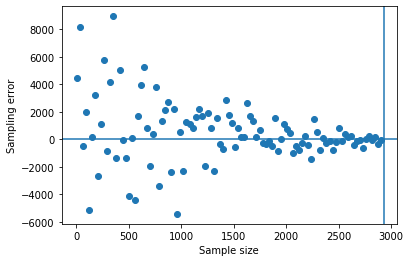

In [84]:
parameter = houses['SalePrice'].mean()
sample_size = 5
sample_sizes = []

sampling_errors = []
for i in range(0, 101):
    sample = houses['SalePrice'].sample(sample_size, random_state = i)
    
    statistic = sample.mean()
    sampling_error = parameter - statistic
    
    sample_sizes.append(sample_size)
    sampling_errors.append(sampling_error)
    
    # print( len(sample_sizes) )
    # print(len(sampling_errors) )
    # print('----')
    sample_size += 29    
    
    

plt.scatter(sample_sizes, sampling_errors)

#ilistra el punto de error 0
plt.axhline(0)

#ilustra el tamaño de la población
plt.axvline(2930)

plt.xlabel('Sample size')

plt.ylabel('Sampling error')

Se puede ver que hay muestras muy pequeñas que tienen menor error de estimación que muchas de las muestras más grandes.

Si cogemos muestras de 3 la mayoría de ellas tendrá una buena estimada de la media.


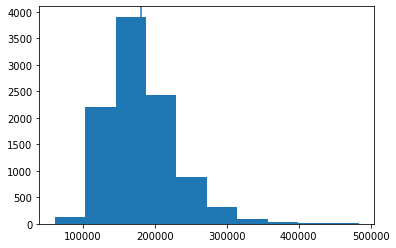

In [85]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(3, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())

Si cogemos muestras más grandes vemoes que están menos asimétricas en su distribución de la estimación de la media.

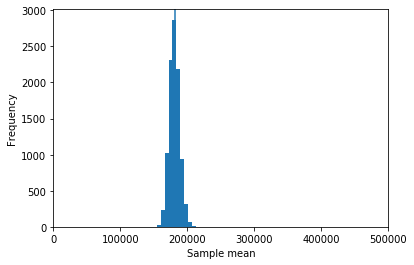

In [86]:
sample_means = []

for i in range(0,10000):
    sample = houses['SalePrice'].sample(100, random_state = i)
    mean = sample.mean()
    sample_means.append(mean)
    
plt.hist(sample_means)
plt.xlim([0, 500000])
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.axvline(houses['SalePrice'].mean())

#### Unbiased estimator

Un estimador de un parámetro no está sesgado cuando el estadístico es de media en las muestras igual al parámetro que  estima.

In [87]:
population = [3, 7, 2]

samples = [[3,7],[3,2],[7,3],[7,2],[2,3],[2,7]]

means = []
for sample in samples:
    mean = sum(sample)/len(sample)
    means.append(mean)
    
    
unbiased = sum(means)/len(means) == sum(population)/len(population)    
print(unbiased)

True


### The Weighted Mean and the Median

Comparamos las medias sacadas del dataframe entero houses con otrto que está separado por años

In [88]:
houses_per_year_dict = {'Year': [2006,2007,2008,2009,2010], 'Mean Price': [181761.648000,185138.207493, 178841.750804, 	181404.567901, 172597.598240]
                  , 'Houses Sold': [625, 694, 622, 648, 341]}
houses_per_year = pd.DataFrame(data=houses_per_year_dict)

In [89]:
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [90]:
mean_new = houses_per_year['Mean Price'].mean()

mean_original = houses['SalePrice'].mean()

difference = mean_original - mean_new
print(difference)

847.3055806593911


Es distinto porque estamos dando más peso a los valores de los años con menos casas vendidas al hacer la media entre los años.

Hay que hacer la weighthed mean o media ponderada

In [91]:
weighted_mean = (houses_per_year['Houses Sold']* houses_per_year['Mean Price']).sum() / houses_per_year['Houses Sold'].sum()

mean_original = houses['SalePrice'].mean()

difference = mean_original - weighted_mean
print(difference)

2.7997884899377823e-08


$\text{weighted mean} = \mu = \cfrac{\sum_{i=1}^{n} x_i w_i}{\sum_{i=1}^{n} w_i}$

In [92]:
import numpy as np
def func_weighted_mean(mean_values, weights):      
    return (np.dot(mean_values, weights) / np.sum(weights))

weighted_mean_function = func_weighted_mean(houses_per_year['Mean Price'], houses_per_year['Houses Sold'])

weighted_mean_numpy = np.average(houses_per_year['Mean Price'], axis=None, weights=houses_per_year['Houses Sold'], returned=False)

equal = weighted_mean_function == weighted_mean_numpy

Otra forma con un for

In [93]:
def weighted_mean(distribution, weights):
    weighted_sum = []
    for mean, weight in zip(distribution, weights):
        weighted_sum.append(mean * weight)
    
    return sum(weighted_sum) / sum(weights)

#### Median / Open ended distributions

Cuando, por ejemplo, tenemos uno de los límites de la distribución no definido (10 habitaciones o más, etc) tiene más sentido hacer la mediana.

Average (promedio) no está restringido a la media. Puede ser la mediana y la moda dependiendo del contexto.

Cuando hay un número par de elementos la mediana es la media de los dos elementos centrales.

In [94]:
rooms_ag = houses['TotRms AbvGrd'].copy()
rooms_ag.replace('10 or more', 10, inplace = True)

rooms_ag = rooms_ag.astype('int32')

rooms_sorted = rooms_ag.sort_values(ascending = True)

middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()

La mediana es más resistente a cambios en la distribución. Es un estadístico Resistente o Robusto.

Esto hace a la mediana ideal para encontrar promedios razonables en distribuciones que contienen outliers/valores atípicos.

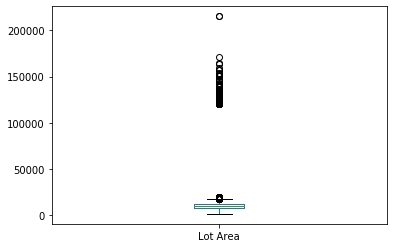

In [95]:
houses['Lot Area'].plot.box()

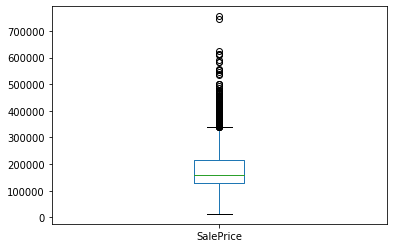

In [96]:
houses['SalePrice'].plot.box()

In [97]:
lotarea_difference = houses['Lot Area'].mean() -  houses['Lot Area'].median()
print(lotarea_difference)


saleprice_difference =  houses['SalePrice'].mean() -  houses['SalePrice'].median()
print(saleprice_difference)

3680.7051194539254
20796.060068259394


#### Ordinal variables and median/mean

For a 1-10 encoding system, the conditions of an "Very good" (8) house would be twice as better than those of a "Below average" (4) house (8/4 = 2).

| Code | Quality        |
|------|----------------|
| 1    | Very poor      |
| 2    | Poor           |
| 3    | Fair           |
| 4    | Below average  |
| 5    | Average        |
| 6    | Above average  |
| 7    | Good           |
| 8    | Very good      |
| 9    | Excellent      |
| 10   | Very excellent |

For a 0-9 encoding system, the same "Very good" (7) house would have conditions that are 
2.3 times as better as the conditions of a "Below average" (3) house (7/3 = 2.3333)

| Code | Quality        |
|------|----------------|
| 0    | Very poor      |
| 1    | Poor           |
| 2    | Fair           |
| 3    | Below average  |
| 4    | Average        |
| 5    | Above average  |
| 6    | Good           |
| 7    | Very good      |
| 8    | Excellent      |
| 9    | Very excellent |

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

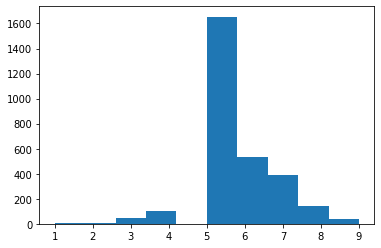

In [98]:
mean = houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()

plt.hist(houses['Overall Cond'])

more_representative = 'mean'

Aunque sea una variable ordinal, en este caso parece que la media es más informativa que la mediana.

En la práctica se usa batsante la media incluso en ordinales.

Por ejemplo, con una distribución de puntuaciones de usuarios sobre la experiencia de uso en una página web:

[1, 1, 1, 2, 2, ,2 , 2, 3, 3, 3]

La mediana y la media es 2.

Se hacen unas mejoras y cambia a  :

[1, 2, 2, 2, 2, 2, 4, 5, 5 , 5]

La mediana sigue igual pero la media es mayor.

**La mediana tiene mayor sentido para las distribuciones con extremos abiertos**

### The Mode

Cuando ni la media ni la mediana son adecuadas para encontrar un valor promedio.

In [99]:
import pandas as pd
houses = pd.read_table('AmesHousing_1.txt', sep = '\t') 

Por ejemplo variables como Land Slope, Roof Style,..

Gentle, Moderate, Severe,

In [100]:
print(houses['Land Slope'].unique())

['Gtl' 'Mod' 'Sev']


In [101]:
print(houses['Land Slope'].value_counts())

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


In [102]:
def mode(input_array):
    dictimode = {}
    for element in input_array:
        if element in dictimode:
            dictimode[element] += 1
        else:
            dictimode[element] = 1
    return max(dictimode, key=dictimode.get)


mode_function = mode(houses['Land Slope'])

mode_method = houses['Land Slope'].mode()

same = mode_function == mode_method

In [103]:
same


0    True
dtype: bool

#### Cuando la variable es Nominal

In [104]:
def mode(input_array):
    dictimode = {}
    for element in input_array:
        if element in dictimode:
            dictimode[element] += 1
        else:
            dictimode[element] = 1
    return max(dictimode, key=dictimode.get), dictimode


mode, value_counts = mode(houses['Roof Style'])

print(mode)
print(value_counts)

Gable
{'Hip': 551, 'Gable': 2321, 'Mansard': 11, 'Gambrel': 22, 'Shed': 5, 'Flat': 20}


In [105]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

#### Variables de Ratio

Por ejemplo el número de cocinas es una variable en la que se peuden hacer operaciones matemáticas fácilmente, pero no tiene sentido decir que la media de cocinas por casa es 1,2.

![title](imagenes/mean_median_mode.png)

In [106]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64


In [107]:
print(houses['Kitchen AbvGr'].mean())

1.0443686006825939


In [108]:
bedroom_variable = 'discrete'

bedroom_mode = houses['Bedroom AbvGr'].mode()

price_variable = 'continuous'

price_mode = houses['SalePrice'].mode()


#### Bimodal / Multimodal y distribuciones sin moda

Cuando hay dos valores con igual rfecuencia máxima se llama distribución bimodal. Si hay más de dos es multimodal.

Si todos los valores tienen la misma frfecuencia no hay moda. Esto ocurre generalmente con las distribuciones continuas ya que es muy difícil que se repitan dos valores.

CUanod la dist es continua se suele agrupar en rangos.


In [109]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


#### Position of mean, median, mode

En general se puede predecir la posición relativa de los tres parámetros en una distribución de frecuencia.

Por ejemplo, para una distribución right skewed

- Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
- Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
- The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

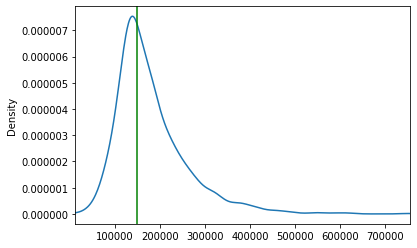

In [110]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                  houses['SalePrice'].max()
                                 )
                         )

import matplotlib.pyplot as plt
plt.axvline(150000, color = 'Green')

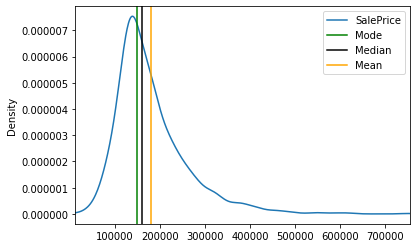

In [111]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

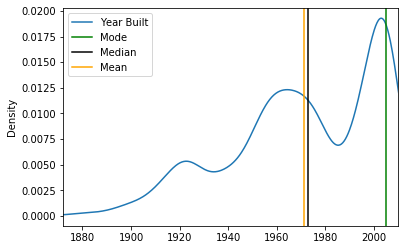

In [112]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),
                                     houses['Year Built'].max()
                                    )
                            )
plt.axvline(2005, color = 'Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend(loc= 'upper left')

#### Distribuciones simétricas
Media y mediana coinicden en distribuciones simétricas. La moda puede no coincidir si la frecuencia más alta está dividida en dos valores a ambos lados de la media y mediana (Como una M). 

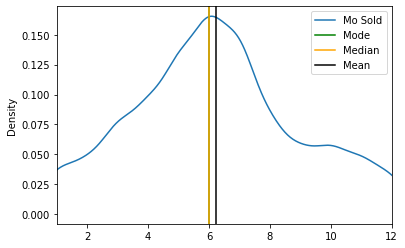

In [113]:
houses['Mo Sold'].plot.kde(xlim=(1,12))
plt.axvline(6, color = 'Green', label='Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label='Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label='Mean')
plt.legend()

#### Sumario Mean, MEdian, MOde

![title](imagenes/table_mean_median_mode.png)

### Measures of Variability

Una forma de medir la variabilidad de una distribución es el rango

$range(X) = max(X) - min(X)$

Calculamos el rango de precios de las casas por años:

In [114]:
def range_func(distribution):
    return max(distribution) - min(distribution)

range_by_year = {}
               
for year in houses['Yr Sold']:
    if year not in range_by_year:                  
        range_by_year[year] = range_func(houses['SalePrice'][houses['Yr Sold'] == year])

In [115]:
print(range_by_year)

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}


El problema con esto es que solo coge información de los dos valores extremos. 

#### Distancia a la media

In [116]:
C = [1,1,1,1,1,1,1,1,1,21]

def average_distance(distribution):
    mean = sum(distribution)/len(distribution)
    print(mean)
    distances = []
    for element in distribution:
        distances.append(element - mean)
        print(distances)
    return sum(distances)/len(distances)

avg_distance = average_distance(C)

print(avg_distance)

3.0
[-2.0]
[-2.0, -2.0]
[-2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 18.0]
0.0


Obviamente la variabilidad no es nula. Para solucionar este problema tendremos que sumar el valor absoluto de las distancias.

Esto es la **desviación promedio absoluta** ó **mean/average absolute deviation**. Que no es desviación típica

In [117]:
def average_distance(distribution):
    mean = sum(distribution)/len(distribution)
    print(mean)
    distances = []
    for element in distribution:
        distances.append(abs(element - mean))
        print(distances)
    return sum(distances)/len(distances)

mad = average_distance(C)

print(mad)

3.0
[2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 18.0]
3.6


#### Mean squared distance o mean squared deviation ó varianza

En vez de hacer el valor absoluto se hace hacer el cuadrado de cada distancia

In [118]:
C = [1,1,1,1,1,1,1,1,1,21]

def squared_distance(distribution):
    mean = sum(distribution)/len(distribution)
    sq_dist = []
    for element in distribution:
        sq_dist.append((element - mean)**2)
        
    return sum(sq_dist)/len(sq_dist)

variance_C = squared_distance(C)
print(variance_C)

36.0


#### Desviación típica 

Es la raíz cuadrada de la varianza. Es más intuitiva.

$s = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$

In [119]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]

def standard_deviation(distribution):
    mean = sum(distribution)/len(distribution)
    sq_dist = []
    for element in distribution:
        sq_dist.append((element - mean)**2)
        
    return sqrt(sum(sq_dist)/len(sq_dist))

standard_deviation_C = standard_deviation(C)

print(standard_deviation_C)

6.0


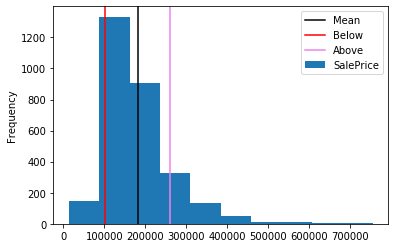

In [120]:
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

Encontrar el año con mayor variabilidad en el precio

In [121]:
houses

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,...,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,...,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,...,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,...,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,...,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,...,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [122]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)




years = []
for year in houses['Yr Sold']:
    if year not in years:
        years.append(year)

variability = {}        
for year in years:
    variability[year] = standard_deviation(houses[houses['Yr Sold'] == year]['SalePrice'])
    
greatest_variability = max(variability, key=variability.get)
lowest_variability = min(variability, key=variability.get)

print(variability)
print(greatest_variability)
print(lowest_variability)



# for year in houses['Yr Sold'].unique():
#     year_segment = houses[houses['Yr Sold'] == year]
#     st_dev = standard_deviation(year_segment['SalePrice'])
#     years[year] = st_dev

{2010: 74521.920711871, 2009: 80794.39070298373, 2008: 75531.94622558328, 2007: 82483.28433288915, 2006: 82553.57563561267}
2006
2010


#### Extensión/spread de una distribución

Es una manera de entender visualmente la desviación típica

Sample 1: 81785.0811515768


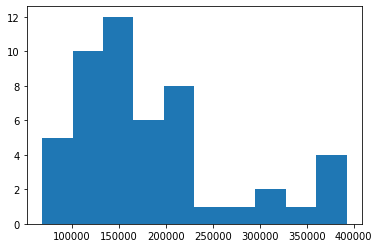

Sample 2: 100370.62998094413


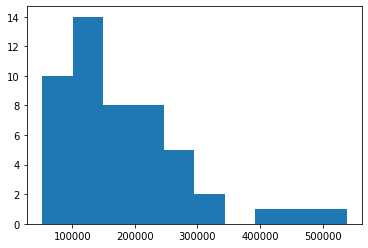

Sample 3: 60676.038515710636


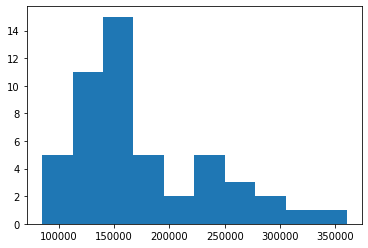

Sample 4: 64436.40016450328


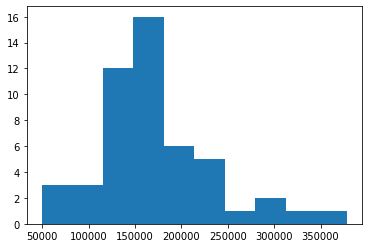

In [123]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))
#     plt.figure()
#     sample.plot.hist()
    plt.hist(sample)
    plt.show()
   

#### Estimación de la desviación típica de la población con muestras

Hacemos 5000 samples de 10 elementos para saber cómo de precisa es la estimación de la sd.

La sd de una muestra se pone con $n$ en vez de $N$ y $\overline{x}$ en vez de $\mu$


$s = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2}$


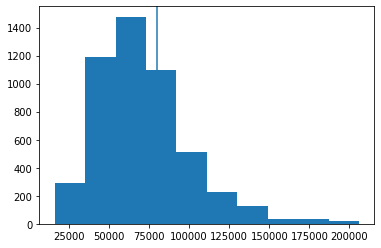

In [124]:
sds = []
for i in range(0,5000):
    sds.append(standard_deviation(houses['SalePrice'].sample(10, random_state = i)))
    
plt.hist(sds)
plt.axvline(standard_deviation(houses['SalePrice']))

Se puede ver que la mayoría de las sd de los samples están en un cluster por debajo de la sd de la población. Esto sugiere que las muestras suelen infraestimar el valor de la desviación típica.
La razón es que en general se van a coger muestras que no abarcan toda la amplitud de la muestra:

![title](imagenes/sd_sample_vs_sd_pop.png)

Para tratar de compensar este efecto se puede utilizar **la correción de Bessel**

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^N (x_i - \overline{x})^2}$

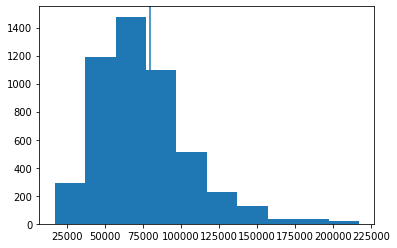

In [125]:
from math import sqrt
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)

plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))  # pop_stdev is pre-saved from the last screen

#### Notaciones de la desviación típica

Para población se utiliza $\sigma$ y $\sigma^2$ para desviación típica y varianza.

$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$


$\sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2$

Para muestras se utiliza $s$ y $s^2$ y se emplea la corrección de Bessel

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^N (x_i - \overline{x})^2}$

$s^2 = \frac{1}{n-1} \sum_{i=1}^N (x_i - \overline{x})^2$



#### Utilizando métodos de Pandas o funciones de NUmpy

In [126]:
sample = houses.sample(100, random_state = 1)
import numpy
from numpy import std, var

pandas_stdev = sample['SalePrice'].std(ddof = 1)

numpy_stdev = numpy.std(sample['SalePrice'], ddof = 1)

equal_stdevs = numpy_stdev == pandas_stdev
print(equal_stdevs)

pandas_var = sample['SalePrice'].var(ddof = 1)

numpy_var = numpy.var(sample['SalePrice'], ddof = 1)

equal_vars = numpy_var == pandas_var
print(equal_vars)

True
True


#### Por qué n-1 es lo mejor para corregir la diferencia entre el estádistico (s) y el parámetro que estima ($\sigma$)

Porque para $n-1$ la varianza es un parámetro no sesgado (unbiased), es decir, si se cogen muestras en una distribución, la media de sus varianzas es igual a la varianza de la distribución de la población completa. En este caso solo cuando hacemos sampling con replacement (que se puede sacar dos veces el mismo valor).

No ocurre lo mismo con la desviación típica pero, al cumplirse con la varianza, sigue siendo mejor que dividir entre $n-2, n-3,..$

Cogemos todos los posbiles samples de $n = 2$ de $[0,3,6]$

La varianza es 6 en la media de los samples y en la distribución

![title](imagenes/variance_unbiased.png)

Para la sd, en la población es 2,54 y en los samples es 1,89

![title](imagenes/sd_biased.png)

Si utilizamos un sampling sin replacement vemos que esto no se cumple

In [127]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]

sds = []
variances =[]
for sample in samples:
    sds.append(numpy.std(sample, ddof = 1))
    variances.append(numpy.var(sample, ddof = 1))
    
mean_std = numpy.mean(sds)
mean_var = numpy.mean(variances)

equal_stdev = mean_std == numpy.std(samples)

equal_var = mean_var == numpy.var(samples)

### Zscores

Queremos saber cómo interpretar datos individuales tomados de la distribución. Por ejemplo, si selecciono una casa y miro su precio, saber si es caro o barato. Para ello se puede comparar con la media y si está dentro del rango de la desviación típica.

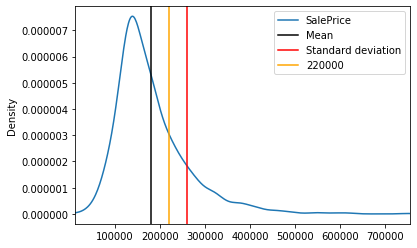

In [128]:
import pandas as pd
houses = pd.read_table('AmesHousing_1.txt')

houses['SalePrice'].plot.kde()
plt.xlim([min(houses['SalePrice']), max(houses['SalePrice'])])

plt.axvline(houses['SalePrice'].mean(), color='Black', label = 'Mean')

plt.axvline(houses['SalePrice'].mean() + houses['SalePrice'].std(ddof=0), color='Red', label = 'Standard deviation')

plt.axvline(220000, color='Orange', label = '220000')

plt.legend()

very_expensive = False

Por ejemplo, tenemos dos distribuciones: una con std 10000 y otra 40000. Si el precio de la casa es 220000 y la media es 180000 podemos decir que en la primera std con 10000 está a 4xstds mientras que en la otra a 1xstds, por lo que en una es muy cara y en otra estaría por debajo de precio respecto a muchas otras casas.

![title](imagenes/zscores_normal_std.png)

In [129]:
st_devs_away = abs(houses['SalePrice'].mean() - 220000)/houses['SalePrice'].std(ddof = 0)
print(st_devs_away)

0.4908280788718362


For any value $x$ in a population with mean $\mu$ and standard deviation $\sigma$ the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with $z$:

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the **z-score**. We'll use the term "z-score" throughout our courses.

El z-score de la distribución:

$z = \cfrac{x - \mu}{\sigma}$

El z-score sobre la muestra, utilizando corrección de Bessel:

$z = \cfrac{x - \overline{x}}{s}$

Puede ser positiva o negativa y se escribe con + delante si es positiva.

In [130]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

import numpy as np

def z_score(value, array, ddof):
    mean = np.mean(array)
    std = np.std(array, ddof = ddof)
    zscore = (value - mean) / std
    return zscore

min_z = z_score(min_val, houses['SalePrice'], 0)
mean_z = z_score(mean_val, houses['SalePrice'], 0)
max_z = z_score(max_val, houses['SalePrice'], 0)

Encontrar la mejor inversión por barrios. Ver en cuales una casa de 200000 está más cerca de la media porque sería más rentable.

In [131]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z
# Segment the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Find the location with the z-score closest to 0
print(z_by_location)
best_investment = 'College Creek'

{'NAmes': 1.7239665910370237, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': -0.5186390646965722}


#### Transformación de distribuciones enteras a z-scores 

Esto se llama standard distribution o estandarizar una distribución.

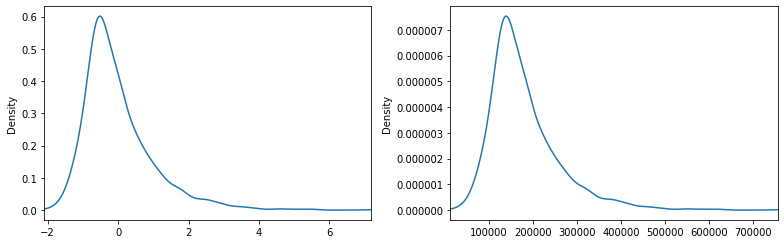

In [132]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partially

¿Qué le ocurre a la media y a la std cuando se transforma? Que tienden a 0 y 1 respectivamente

In [133]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )


z_mean_price = houses['z_prices'].mean()

z_stdev_price = houses['z_prices'].std(ddof =0)


houses['z_area'] = houses['Lot Area'].apply(
   lambda x: ((x - houses['Lot Area'].mean())/ houses['Lot Area'].std(ddof=0)) 
   )

z_mean_area = houses['z_area'].mean()

z_stdev_area = houses['z_area'].std(ddof=0)

Cuando se estandariza una distribución:

$\mu_z = \cfrac{\mu - \mu}{\sigma} = 0$

$\sigma_z = \cfrac{(\mu + \sigma) - \mu}{\sigma} = \cfrac{\sigma}{\sigma} = 1$

In [134]:
import numpy
from numpy import std, mean
population = [0,8,0,8]

standardized_pop = (population - numpy.mean(population))/numpy.std(population)

mean_z = numpy.mean(standardized_pop)

stdev_z = numpy.std(standardized_pop)

#### Comparar índices

Si queremos comparar por ejemplo dos puntuaciones distintas (hechas por dos empresas/personas) en la calidad de una casa lo que se podría hacer es estandarizar las distribuciones con sus propias media y std. Una vez hecho esto se podrían juntar ambas distribuciones ya que la información sería más similar.

Para hacer los valores más intuitivos, se puede coger una transformada y volver a transformarla otorgándole determinada $\mu$ y $\sigma$.

Esto es hace con la fórmula $x = z\sigma + \mu$ 

For any standardized distribution we can also convert the z-scores back to the original values. All we have to do is use the initial values for $\mu$ and $\sigma$ in the $x = z\sigma + \mu$ formula. However, it's more common in practice to transform the standardized distribution with convenient values for $\mu$ and $\sigma$.

One practical example include transforming test scores for the SAT test using $\mu = 500$ and $\sigma = 110$

or transforming IQ scores from different measurement systems using $\mu = 100$ and $\sigma = 15$


##  Probability: Fundamentals

### Estimating Probabilities

Empirical probability = relative frequency

$P(E) = \cfrac{\text{number of times event E happened}}{\text{number of times we repeated the experiment
}}$

In [135]:
# INITIAL CODE
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads += 1
    current_probability = heads / n
    probabilities.append(current_probability)
        
        
print(probabilities[:10])


print(probabilities[-10:])

[1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.7777777777777778, 0.7]
[0.4993494144730257, 0.49939951961569257, 0.4993495446812769, 0.4993996397838703, 0.4993496748374187, 0.4992997198879552, 0.49934980494148246, 0.4993998799759952, 0.49934993499349933, 0.4994]


(-1000, 10000)

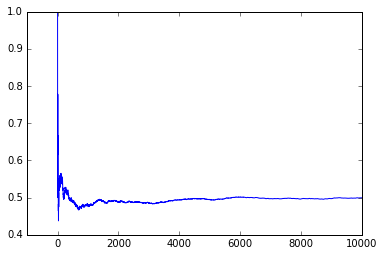

In [136]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
x = np.linspace(1, 10000, 10000)
y = probabilities
plt.plot(x, y)
plt.xlim([-1000,10000])

(-1000, 10000)

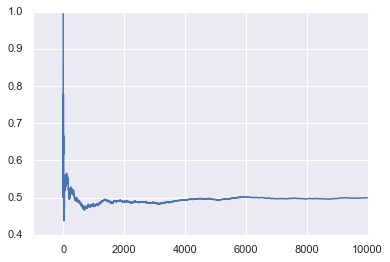

In [137]:
import seaborn as sns
sns.set()
sns.lineplot(x = np.linspace(1, 10000, 10000), y = probabilities)
plt.xlim([-1000,10000])

properly calculating empirical probabilities requires us to perform a random experiment many times, which may not always be feasible in practice. An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have equal chances of occurring. This allows us to use the following formula to calculate the probability of an event E:

$P(E) = \cfrac{\text{number of successful outcomes}}{\text{total number of possible outcomes}}$

So far, we've repeatedly used the terms "event" and "outcome," and we need to add a few clarifications. An outcome is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are 1, 2, 3, 4, 5, and 6. An event, however, has a richer meaning and can include more than one outcome (or even zero outcomes):

- The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes 1, 3, and 5.
- The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes 2, 3, and 4.
- The event that we'll get a number greater than 20 when we roll a six-sided die — this event doesn't include any of the - possible outcomes corresponding to rolling a six-sided die.

Although an event can include a single outcome (like the event of getting a 2 when we roll a die), the two concepts still have a different meaning. We always assign probabilities to events, not outcomes, even if the event includes only one outcome.

### Probability Rules

En estadística el conjunto de todas los posibles resultados únicos se llama el espacio de muestras (**Sample space**) y se denota con la letra $\Omega$ y se agrupa dentro de llaves $\{\}$.

Para un dado de 6 caras el espacio de muestra sería $\Omega = \{1,2,3,4,5,6\}$

Para una moneda $\Omega = \{cara, cruz\}$

Para un experimento que sea lanzar una moneda dos veces $\Omega = \{HH,HT,TH,TT\}$ con Heads y Tails.

También podemos representar los eventos como sets o conjuntos.

Por ejemplo: El evento que salga número par en un dado $E = \{2,4,6\}$


La probabilidad de un evento es:

$P(E) = \cfrac{\text{number of successful outcomes}}{\text{total number of possible outcomes
}}$

La probabilidad de un evento imposible es 0 $P(\emptyset) = 0$ y de un evento seguro es 1 $P(\Omega) = 1$ porque $\Omega$ era el set entero

#### Regla de la adición


Si $P(A) = P(B) = \cfrac{1}{6}$ entonces $P(A\space or \space B) = \cfrac{2}{6}$

$P(A\space or \space B \space or \space C \space ... \space Z) = P(A) + ... P(Z)$

Cuando hay intersección en los eventos hay que substraer la probabilidad de la unión de ambos conjuntos
$P(C\space or\space D)) = P(C) + P(D) - P(C \space and \space D)$

![title](imagenes/p_adicion_interseccion.png)

#### Diagramas de Venn
![title](imagenes/diagramas_venn.png)

Los diagramas que no se intersecan son mutually exclusive y los que se intersecan son mutually non-exclusive

La notación correcta de la unión y la intersección es:

$P(C\cup D)) = P(C) + P(D) - P(C \cap D)$

Union = or = $\cup$

Interseccion = and = $\cap$

### Solving complex probability problems

What is the probability that it takes three flips or more for a coin to land heads up

What is the probability of a coin landing heads up 18 times in a row?

What is the probability of getting at least one 6 in four throws of a single six-sided die?

What is the probability of getting at least one double-six in 24 throws of two six-sided dice?

What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?


Regla de la adición:

$P(C\cup D)) = P(C) + P(D) - P(C \cap D)$

Fórmula empírica de la probabilidad o frecuencia relativa:

$P(E) = \cfrac{\text{number of times event E happened}}{\text{number of times we repeated the experiment
}}$

La probabilidad de que salga menor que 7 en un dado es 1 porque el número de posibles resultados exitosos es igual al número de posible resultados

$A = \{1,2,3,4,5,6\}$

$\Omega = \{1,2,3,4,5,6\}$

Probabilidad de que salga 2

$B = \{2\}$

$P(B) =\cfrac{1}{6}$

$nonB = \{1,3,4,5,6\}$

$P(nonB) =\cfrac{5}{6}$

$P(B \cup nonB) = P(B)+ P(nonB) =1$

#### Cuál sería probabilidad de sacar Cara solo a partir del tercer lanzamiento de una moneda

$A = \{3,4,5,...,100,..\}$

$nonA = \{1,2\}$

$P(A) = 1 - P(nonA) = P(\text{Dos Cruces Seguidas}) = 1 - P(\text{Probabilidad de que haya alguna cruz en 2 lanzamientos})$

![title](imagenes/arbol_moneda.png)

#### Complemento de un conjunto

En vez de poner $nonA$ la notación correcta es el complemento:

$P(A) = 1 - P(A^C)$


#### The multiplication rule

Cuando se calcula la probabilidad de que ocurran dos eventos:

$P(A \cap B) = P(A) \times P(B)$

Solo es válida para eventos independientes

Por ejemplo, dos eventos que no son independientes serían, en un mismo lanzamiento:

A: Que salga un número menor que 4

B: Que salga un número par

Una vez ocurre A {1,2,3}, que ocurra B ya no es 1/2 es 1/3 porque solo puede ser el 2.

#### Probabilidad de que salga un 6 en cuatro lanzamientos

$P(A) = 1-P(A^C) = 1 - \left(\cfrac{5}{6}\right)^4$

#### Sampling con replacement y sin replacement

Por ejemplo, si calculamos la probabilidad de sacar 4 Ases de una baraja de 52 seguidos y se hace sin recolocación:

$P(AAAA) = \cfrac{4}{52}\times \cfrac{3}{51}\times \cfrac{2}{50}\times \cfrac{1}{49} = \cfrac{4!}{\cfrac{52!}{(52-4)!}}$

### Permutations and combinations

#### Rule of product / multiplication principle

Es distinto a la multiplication rule de antes.

Esto es para calcular el número de posibles resultados concatenando experimentos. Por ejemplo, si tiramos un dado y una moneda a la vez tenemos 12 resultados posibles:

![title](imagenes/rule_of_product.png)

Y si tiramos la moneda otra vez:

![title](imagenes/rule_of_product_2.png)

#### Número de resultados con combinaciones de números

Si queremos saber la probabilidad de acertar aleatoriamente un pin de 4 dígitos sería como elegir 4 números aleatoriamente con reemplazo.

$E1 = \{0,1,2,3,4,5,6,7,8,9\}$

$E2 = \{0,1,2,3,4,5,6,7,8,9\}$

$E3 = \{0,1,2,3,4,5,6,7,8,9\}$

$E4 = \{0,1,2,3,4,5,6,7,8,9\}$

$\text{Nº de resultados} = 10 \times 10 \times 10 \times 10$

#### Permutaciones

Si el orden de los elementos se tiene en cuenta se llama permutación.

En el ejemplo anterior eran permutaciones con reemplazo.

Un ejemplo de permutación sin reemplazo sería calcular el número de permutaciones que hay con los números $\{5,6,7\}$

El evento E1 tiene 3 posibilidades, el E2 tiene 2 y el E3 solo tiene 1.

![title](imagenes/permutacion_sin_reemplazo.png)

$Permutations = n \cdot (n-1) \cdot (n-2)... \cdot 1 = n!$

In [146]:
def factorial(number):
    if(number == 1):
        return 1
    else:
        result = number*factorial(number-1)
    return result


permutations_1 = factorial(6)
permutations_2 = factorial(52)
        

#### Elección de k elementos en un grupo de n elementos sin reemplazo

Cuando tenemos 52 cartas y tenemos que sacar 5 sin reemplazo tendríamos

$Permutaciones = 52 \cdot 51 \cdot 50 \cdot 49 \cdot 48 = 311875200$

$_{n}P_k = n \cdot (n-1) \cdot ... \cdot (n-k+1) = \cfrac{n!}{(n-k)!}$

#### Combinaciones: Si el orden de los eventos no importa

Por ejemplo, en poker da igual el orden de salida de las 5 cartas.

Si tenemos 5 determinadas cartas, existen $5! = 120$ ordenaciones distintas.

Una mano en poker sería igual en esos 120 casos.

Si $C$ es el número total se manos únicas que existen en poker:

$C \cdot 5! = _{52}P_5 = \cfrac{52!}{(52-5)!} = 311875200$

$C = \cfrac{311875200}{120} = 2598960$

$\binom{n}{k} = _{n}C_k = \cfrac{n!}{k!(n-k)!}$

##  Conditional Probability:

###  Conditional Probability: Fundamentals

- Assign probabilities to events based on certain conditions by using conditional probability rules.
- Assign probabilities to events based on whether they are in a relationship of statistical independence or not with other events.
- Assign probabilities to events based on prior knowledge by using Bayes' theorem.
Create a spam filter for SMS messages using the multinomial Naive Bayes algorithm.


![title](imagenes/conditional_1.jpg)

Say we roll a fair six-sided die and want to find the probability of getting an odd number, given the die showed a number greater than 1 after landing. Using probability notation, we want to find P(A|B) where:

- A is the event that the number is odd: A = {1, 3, 5}
- B is the event that the number is greater than 1: B = {2, 3, 4, 5, 6}

To find P(A|B), we need to use the following formula:

$P(A|B) = \cfrac{\text{number of succesful outcomes}}{\text{total number of possible outcomes
}}$

We know for sure event B happened (the number is greater than 1), so the sample space is reduced from {1, 2, 3, 4, 5, 6} to {2, 3, 4, 5, 6}:

$ \Omega = \{1,2,3,4,5,6\} \xrightarrow{becomes} \Omega = \{2,3,4,5,6\}$

This means we're left with only five total possible outcomes if B happens:

        total number of possible outcomes = 5
        
        
        
The total number of possible outcomes above is given by the number of elements in the reduced sample space Ω = {2,3,4,5,6}
there are five elements. The number of elements in a set is called the cardinal of the set. 
        
cardinal($\Omega$) = 5

total number of possible outcomes = card($\Omega$) = card(B)

$P(A|B) = \cfrac{\text{number of succesful outcomes}}{\text{card(B)
}}$

Recall we're interested in finding the probability of getting an odd number, given the number the die showed is greater than 1. There are three odd numbers on a regular six-sided die (1, 3, and 5), but we know for sure we got a number greater than 1, so the only possible odd numbers we can get are 3 and 5. This means that the number of possible successful outcomes is two:

number of succesful outcomes = 2 = card({3,5})

The set {3,5} is the result of the intersectionbetween set A and B.

$A \cap B = \{3,5\}$

![title](imagenes/cpm1_viz2.png)

$P(A|B) = \cfrac{\text{card($A \cap B$)}}{\text{card(B)}}$


Find P(A|B), where A is the event where the sum is an even number, and B is the event that the sum is less than eight.

![title](imagenes/pr1m2_sums.png)

In [138]:
card_b = 21

card_a_and_b = 9

p_a_given_b = card_a_and_b / card_b

print(p_a_given_b)

0.42857142857142855


We'll now use the formula in the context of a more realistic example. A team of biologists wants to measure the efficiency of a new HIV test they developed (HIV is a virus that causes AIDS, a disease which affects the immune system). They used the new method to test 53 people, and the results are summarized in the table below:

![title](imagenes/cpm1_table1.png)

By reading the table above, we can see that:

- 23 people are infected with HIV.
- 30 people are not infected with HIV (HIVC means not infected with HIV — recall from the previous course that the superscript "C" indicates a set complement).
- 45 people tested positive for HIV .
- 8 people tested negative for HIV.
- Out of the 23 infected people, 21 tested positive (correct diagnosis).
- Out of the 30 not-infected people, 24 tested positive (wrong diagnosis).

The team now intends to use these results to calculate probabilities for new patients and figure out whether the test is reliable enough to use in hospitals. They want to know:

- What is the probability of testing positive, given that a patient is infected with HIV?
-What is the probability of testing negative, given that a patient is not infected with HIV?
P(T+ | HIV) is the probability of testing positive, given that the patient is infected with HIV, and, according to the formula, we have:

$P(A|B) = P(T^+ | \text{HIV}) = \cfrac{\text{card($T^+ \cap \text{HIV}$)}}{\text{card(HIV)}} = \cfrac{21}{23}$

Si utilizamos probabilidades en vez de cardinales llegaríamos al mismo resultado:


La probabilidad de dar positivo en el test y tener HIV es: (no es lo mismo que dar positivo sabiendo que que tienes HIV)

$P(\text{$T^+ \cap \text{HIV}$)} = \cfrac{21}{53}$

La probabilidad de tener HIV es:

$P(\text{HIV}) = \cfrac{23}{53}$

$P(\text{$A \cap B$}) = \cfrac{\text{number of succesful outcomes}}{\text{total number of possible outcomes}} = \cfrac{\text{card($A \cap \text{B}$)}}{\text{card($\Omega$)}}$

$P(B) = \cfrac{\text{number of succesful outcomes}}{\text{total number of possible outcomes}} = \cfrac{\text{card( B)}}{\text{card($\Omega$)}}$

$P(A|B) = \cfrac{\text{P($A \cap \text{B}$)}}{\text{P(B)}}$



In [139]:
p_negative_given_non_hiv = 6 / 30

print(p_negative_given_non_hiv)

0.2


###  Conditional Probability: Intermediate

#### Diferencia entre $P(A|B)  P(A \cap B) P(A \cup B)$

![title](imagenes/tabla_cond_mose_laptop.png)


$P(\text{Compar un Mouse $ \cap $ Compar un Laptop}) = \cfrac{32}{2000}$


$P(\text{Compar un Mouse $ | $ Compar un Laptop}) = \cfrac{32}{90}$



$P(\text{Compar un Mouse $ \cup $ Compar un Laptop}) = \cfrac{32 + 483 + 58}{2000}$



#### Complementos en probabilidad condicional


Al igual que $P(A) = 1 - P(A^C)$

$P(A|B) = 1 - P(A^C|B)$

Pero nunca se da haciendo el complementario en el evento dado como conocido (B)

$P(A|B) \ne 1 - P(A|B^C)$

#### Otro Ejemplo  :  Cuando no tenemos una tabla

Tenemos un cuenco con canicas: 6 verdes y 4 rojas.

Sacamos sin reemplazo.

Probabilidad de roja en el primero (evento A) y de verde en el segundo (evento B).

El evento B no es independiente del A.

Queremos $P(A \cap B)$

Sabemos que $P(A|B) = \cfrac{\text{P($A \cap \text{B}$)}}{\text{P(B)}}$

$P(A|B)\cdot P(B) =   P(A \cap B)$

Igualmente $P(B|A) = \cfrac{\text{P($B \cap \text{A}$)}}{\text{P(A)}}$

$P(A \cap B) = P(B \cap A)$

Esto se conoce como la **regla de la multiplicación** 

$P(A \cap B) = P(A|B)\cdot P(B)$

$P(A \cap B) = P(B|A)\cdot P(A)$

En cuanto a las canicas:

$P(A) = \cfrac{4}{10}$ 

$P(B|A) = \cfrac{6}{9}$

$P(A \cap B) = \cfrac{4}{10}  \cdot \cfrac{6}{9} = \cfrac{24}{90}$

#### Nota importante sobre regla de la multiplicación

Todo lo del ejemplo anterior tiene sentido cuando son eventos **depedientes**.

Si los eventos son independientes, es mucho más sencillo. Por ejemplo, no afecta el resultado de un dado al de cualquier otro lanzamiento siguiente.

Dos eventos A y B son **estadísticamente independientes** si:

$ P(A) = P(A|B)$

$ P(B) = P(B|A)$

$P(A \cap B) = P(A) \cdot P(B)$

#### Más de dos eventos independientes/dependientes entre sí

Cuando son independientes, la regla de la multiplicación se puede extender de manera indefinida:

$P(A \cap B \cap C \cap ... X \cap Y \cap Z \cap ) = P(A) \cdot P(B) \cdot P(B) ...P(X) \cdot P(Y) \cdot P(Z)  $

Para que sean independientes se tienen que dar dos condiciones: 

- Pairwise independent
- Mutually independent

#### Pairwise independent

Para tres eventos A, B, C

$P(A \cap B) = P(A) \cdot P(B)$

$P(A \cap C) = P(A) \cdot P(C)$

$P(C \cap B) = P(C) \cdot P(B)$

#### Mutually independent

Para tres eventos A, B, C

$P(A \cap B \cap C) = P(A) \cdot P(B) \cdot P(C)$


Un ejemplo que **cumple independencia dos a dos pero no cumple independencia mutua**:
 
Lanzando una moneda dos veces

Evento **A**: Que salga HH ó HT $\{HH, HT\} $

Evento **B**: Que salga HH ó TH $\{HH, TH\} $

Evento **C**: Que salga HH ó TT $\{HH, TT\} $

Hay 4 posibles outcomes $\Omega  = \{HH, HT, TH, TT\}$

$P(A) = P(B) = P(C) = \cfrac{2}{4}$

$A \cap B = \{HH\}$

$P(A \cap B) = P(A) \cdot P(B) = \cfrac{1}{4} $

$P(A \cap C) = P(A) \cdot P(C) = \cfrac{1}{4}$

$P(C \cap B) = P(C) \cdot P(B) = \cfrac{1}{4}$

$A \cap B \cap C= \{HH\}$

$P(A) \cdot P(B) \cdot P(C) = \cfrac{1}{2} \cdot \cfrac{1}{2} \cdot \cfrac{1}{2} \ne P(A \cap B \cap C) = \cfrac{1}{4} $

#### Fórmula de regla de multiplicación para 3 eventos dependientes

$P(A \cap B \cap C) = P(( A \cap B) \cap C) =  P(C|A \cap B) \cdot P(A \cap B) =  P(C|A \cap B) \cdot P(B | A) \cdot P(A)$



###  Bayes Theorem

#### Definición de exclusividad (en contraste con dependencia):

Cuando dos eventos no pueden ocurrir al mismo momento (cara y cruz, 4 y 5 en un lanzamiento de dado)

Independecia $\Rightarrow$ $P(A \cap B) = P(A) \cdot P(B)$

Dependencia $\Rightarrow$ $P(A \cap B) = P(A|B) \cdot P(B)$

Exclusividad $\Rightarrow$ $P(A \cap B) = 0$


#### Recordatorio de regla de la adición

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$
 
Si son eventos mutually exclusive

$P(A \cup B) = P(A) + P(B)$
  
Un ejemplo de uso con los tests de HIV:

- probabilidad de test positivo cuando el paciente NO tiene HIV : $ P \left( T^+ | \text{HIV}^C \right) = 0.0105$ 
- probabilidad de test positivo cuando el paciente SÍ tiene HIV : $ P \left( T^+ | \text{HIV} \right) = 0.9978$ 
- probabilidad de tener HIV : $ P \left( \text{HIV} \right) = 0.0014$ 
- probabilidad de NO tener HIV : $ P \left( \text{HIV}^C \right) = 0.9986$ 

¿Cuál es la probabilidad de que una persona al azar salga positivo? $P(T^+)$

En notación de conjuntos se podría decir que:

$ T^+ =  \left( \text{HIV} \cap T^+ \right) \cup \left( \text{HIV}^C \cap T^+ \right)$ 

![title](imagenes/bayes_adition.png)

Como $\left( \text{HIV} \cap T^+ \right)$ y $\left( \text{HIV}^C \cap T^+ \right)$ son mutuamente excluyentes:

$ P(T^+) =  P \left( \left( \text{HIV} \cap T^+ \right) \cup \left( \text{HIV}^C \cap T^+ \right) \right) = P \left( \text{HIV} \cap T^+ \right) + P \left( \text{HIV}^C \cap T^+ \right) $ 

Usando la regla de la multiplicación podemos utilizar los datos de probabilidades que tenemos para calcular $ P(T^+)$




#### Exhaustividad

Cuando dos eventos conforman todo el espacio de muestras.

![title](imagenes/exhaustivity.png)

Una fórmula general para la probabilidad de un evento A sería:

$ P(A) =  P \left(   B \cap A \right) + P \left( B ^C \cap A \right) $ 

Por la regla de la multiplicación:

$P(A) =  P(A|B)\cdot P(B) +  P(A|B^C)\cdot P(B^C)$

Ejemplo:

$B$ es volar con Boeing 737 y $B^C$ es volar con Airbus A320 cuando compras billete con una aerolínea determinada

$A$ es llegar tarde

#### Ejemplo con tres eventos en vez de dos

Añadimos un tercer modelo de avión Embraer ERJ145

![title](imagenes/bayes_flight_delay.png)

$P(Delay) =  P(Airbus) \cdot P(Delay|Airbus) + P(Boeing) \cdot P(Delay|Boeing) + P(ERJ) \cdot P(Delay|ERJ) $

#### Ley de la Probabilidad Total

![title](imagenes/total_probability.png)

$P(A) = \sum\limits_{i=1}^{n} P(B_i)\cdot P(A|B_i) $



#### Teorema de Bayes

Por ejemplo, si ahora quisieramos saber $P(Boeing|Delay en el caso Airbus y Boeing)$ (Antes era $P(Delay|Boeing), que es conocida$)

$P(B|A) = \cfrac{P(B)\cdot P(A|B)}{\sum\limits_{i=1}^{n} P(B_i)\cdot P(A|B_i)}$

$P(Boeing|Delay) = \cfrac{P(Boeing)\cdot P(Delay|Boeing)}{ P(Boeing)\cdot P(Delay|Boeing) + P(Airbus)\cdot P(Delay|Airbus)  }$

#### Prior Probability y Posterior Probability


- Before doing any test:  Prior $P(HIV)$, $P(Spam)$
- After testing positive: Posterior $P(HIV|T^+)$, $P(Spam|"Secret")$ 



### The Naive Bayes Algorithm

Tomamos como ejemplo un clasificador de spam según el contenido de un mensaje.

Podríamos hacerlo con condiciones (if), pero sería muy complejo según aumenta la variabilidad de los mensajes posibles.

Otra solucion es el algoritmo de Bayes Ingenuo (Naive Bayes):

El ordenador aprende de una clasificación hecha por un humano y luego clasifica información nueva.

Aprende qué cuenta como spam o no y luego calcula probabilidades. Trata de responder dos preguntas de probabilidad condicional:

- Cuál es la probabilidad de que un mensaje sea spam dado su contenido $P(Spam|New\ message)$
- Cuál es la probabilidad de que un mensaje NO sea spam dado su contenido  $P(Spam^C|New\ message)$


$P(Spam|New\ message) =  \cfrac{P(Spam \cap New\ message)}{P(New\ message)} = \cfrac{P(Spam) \cdot P(New\ message |  Spam)}{P(New\ message)}$

$P(Spam^C|New\ message) =  \cfrac{P(Spam^C \cap New\ message)}{P(New\ message)} = \cfrac{P(Spam^C) \cdot P(New\ message |  Spam^C)}{P(New\ message)}$

Como solo queremos compararlas entre ellas, el denominador no es necesario:


$P(Spam|New\ message) \varpropto P(Spam) \cdot P(New\ message |  Spam)$

$P(Spam^C|New\ message) \varpropto P(Spam^C) \cdot P(New\ message |  Spam^C)$


#### ¿Cómo usaría el algoritmo las clasificaciones hechas por humanos para calcular las probabilidades?


![title](imagenes/table_spam_messages.png)

Tenemos esta tabla simplista pero ilustrativa.

Calcular las probabilidades de que el mensaje "secret" sea o no spam.

$P(Spam) = \cfrac{\text{Número de mensajes que son spam}}{\text{Número de mensajes totales}} = \cfrac{2}{3}$

$P("Secret" | Spam) = \cfrac{\text{Número de veces que aparece la palabra "secret"}}{\text{Número de palabras que hay en los mesajes clasificados como spam}} = \cfrac{4}{7}$

$P(Spam|"Secret") \varpropto P(Spam) \cdot P("Secret" |  Spam) = \cfrac{2}{3}  \cdot \cfrac{4}{7} = \cfrac{8}{21}$

$P(Spam^C|"Secret") \varpropto P(Spam^C) \cdot P("Secret" |  Spam^C) = \cfrac{1}{3}  \cdot \cfrac{4}{7} = \cfrac{4}{21}$



#### Ejemplo con un mensaje con más de una palabra

Tenemos una tabla nueva:

![title](imagenes/table_spam_messages.png)

Si el mensaje lo dividimos en 4 palabras w1, w2, w3, w4 podemos buscar proporcinalidades en la probabilidad como:

$P(Spam|w_1) \varpropto P(Spam) \cdot P(w_1 |  Spam) \cdot P(w_2 |  Spam) \cdot P(w_3 |  Spam) \cdot P(w_4 |  Spam) = \cfrac{1}{2} \cdot \cfrac{4}{7} \cdot \cfrac{1}{7} \cdot \cfrac{4}{7} \cdot \cfrac{4}{7} $

$P(Spam^C|w_1) \varpropto P(Spam^C) \cdot P(w_1 |  Spam^C) \cdot P(w_2 |  Spam^C) \cdot P(w_3 |  Spam^C) \cdot P(w_4 |  Spam^C) = \cfrac{1}{2} \cdot \cfrac{2}{9} \cdot \cfrac{1}{9} \cdot \cfrac{2}{9} \cdot \cfrac{2}{9}  $


#### ¿Cómo se llega a estas relaciones?

Por intersección de los cuatro eventos y la regla de la multiplicación se puede decir que:

$P(Spam|w_1, w_2, w_3, w_4) \varpropto  P(Spam \cap w_1 \cap w_2 \cap w_3 \cap w_4) $

Con la regla de la mutiplicación podemos seguir con:


$P(Spam \cap w_1 \cap w_2 \cap w_3 \cap w_4) = P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 \cap w_3 \cap w_4 \cap Spam) $

Y sucesivamente llegamos a:

$P(Spam \cap w_1 \cap w_2 \cap w_3 \cap w_4) = P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 | w_3 \cap w_4 \cap Spam)  \cdot P(w_3 | w_4 \cap Spam) $

Y si asumimos **Independencia Condicional** entre w1, w2, w3 y w4, es decir, que se puedan quitar las w de la parte condicional (Derecha de la barra) si hay una w en la parte de la hipótesis (Izquierda de la barra) nos queda: 

$P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) = P(w_1 |  Spam)$

$P(w_2 | w_3 \cap w_4 \cap Spam) = P(w_2 |  Spam)$

$P(w_3 | w_4 \cap Spam) = P(w_3 | Spam)$


$P(w_4 | Spam) = P(w_4 | Spam)$

Esta asunción de independencia condicional lo que quiere decir es que no consideramos que haya palabras que tengan mayor probabilidad de utilizarse con ciertas otras, por eso se le llama **Ingenuo (Naive)**

La fórmula general para **n** palabras en un mensaje sería:

$P(Spam | w_1, w_2,...w_n) \varpropto P(Spam) \cdot \prod \limits_{i=1}^{n} P(w_i | Spam) $

$P(Spam^C | w_1, w_2,...w_n) \varpropto P(Spam^C) \cdot \prod \limits_{i=1}^{n} P(w_i | Spam^C) $

#### Laplace Smoothing // Additive Smoothing

Un problema que tiene la fórmula anterior es que si una palabra no aparece en ningun mensaje utilizado para el "entrenamiento" la porbabilidad se hace 0 por ser todo un producto. Para evitar esto se hace el Additive Smoothing:

$P(word | Spam)=\cfrac{N_{word|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}  }$

Siendo:

$N_{word|Spam}$ número de veces que aparece word en los mensajes de spam.

$N_{Spam}$ número de palabras  en los mensajes de spam.

$N_{Vocabulary}$ número de palabras únicas en todos los mensajes.

En general $\alpha = 1$. Si $\alpha < 1$ se llama Lidstone Smoothing.

Aquí hemos visto el **Multinomial Naive Bayes**, dependiendo de las asunciones y la matemática elegida podrá haber otros:

- Multinomial Naive Bayes
- Gauss Naive Bayes
- Bernoulli Naive Bayes

Todos son Naive por la asunción de independencia condicional.

## Hypotesis Testing: Fundamentals

### Significance Testing

In this lesson, we'll learn about hypothesis testing and statistical significance. A hypothesis is a pattern or rule about a process that we can test. We use hypothesis testing to determine if a change we made had a meaningful impact or not.

Hypothesis testing allows us to calculate the probability that random chance was responsible for the difference in outcome. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a more likely conclusion.

Let's begin with a null hypothesis that describes the status quo, then state an alternative hypothesis. We use the alternate hypothesis in comparison with the null hypothesis to decide which describes the data better. In the end, we need to do one of the folllowing:

- Reject the null hypothesis
- Fail to reject the null hypothesis

If a new weight loss pill helped people lose more weight:

- Null hypothesis: Patients who went on the weight loss pill didn't lose any additional weight compared to those who did not take the pill.
- Alternative hypothesis: Patients who went on the weight loss pill lost more weight than those who didn't.

To help us determine if the weight loss pill was effective, we conducted a study with 100 volunteers and split them into two groups randomly:

- Group A received a placebo to consume on a daily basis.
- Group B received the actual weight loss pill to consume on a daily basis.

Both groups received instructions not to change anything else about their diets. Group A is referred to as the control group while group B is referred to as the treatment group. This type of study is called a blind experiment since the participants didn't know which pill they were receiving. This helps us reduce the potential bias that is introduced when participants know which pill they were given. For example, participants who are aware they are given the weight loss pill may try to add healthier foods to their diet to help them lose more weight. Both groups were weighed before the study began and a month after the study ended.

Understanding the research design for a study is an important first step that impacts the rest of your analysis. It helps us uncover potential flaws in the study that we need to keep in mind as we dive deeper. The weight loss pill study we conducted is known as an experimental study. Experimental studies usually involve bringing in participants, instructing them to perform certain tasks, and observing them. A key part of running an experimental study is random assignment, which involves assigning participants in the study to random groups without revealing which group each participant is assigned. Before exploring and analyzing a dataset, it's important to understand how the study was conducted. Flaws within the study can lead you to the wrong conclusions.


Statistics helps determine if the difference in the weight lost is because of random chance or an actual difference in the outcomes. If there is a meaningful difference, we say that the results are statistically significant.

- Null hypothesis: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill.

- Alternative hypothesis: participants who consumed the weight loss pills lost more weight than those who didn't take the 
pill.

In [2]:
weight_lost_b = [5, 4, 5, 5, 4, 5, 7, 5, 4, 3, 3, 5, 10, 3, 4, 9, 7, 6, 9, 4, 2, 5, 7, 7, 7, 5, 4, 8, 9, 6, 7, 6, 7, 6, 3, 5, 5, 4, 2, 3, 3, 5, 6, 9, 7, 6, 4, 5, 4, 3]

weight_lost_a = [3, 2, 3, 4, 3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 4, 1, 3, 2, 1, 3, 4, 3, 2, 3, 7, 2, 3, 2, 5, 1, 1, 1, 3, 2, 4, 10, 2, 3, 2, 5, 6, 2, 3, 2, 3, 4, 1, 3, 3, 1]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean_group_a = np.mean(weight_lost_a)
mean_group_b = np.mean(weight_lost_b)

#### Test statistic

To determine which hypothesis accurately describes the data, we need to frame the hypotheses quantitatively. The first step is to decide a test statistic, which is a numerical value that summarizes the data and one we can use in statistical formulas. The test statistic runs a statistical test that determines whether the difference between the groups was due to random chance.

*En español test statistic es estadístico de contraste*

Elegimos la diferencia entre medias:

$\bar{x}_b - \bar{x}_a$


- Null hypothesis: $\bar{x}_b - \bar{x}_a = 0$

- Alternative hypothesis:  $\bar{x}_b - \bar{x}_a > 0$


In [4]:
mean_difference = mean_group_b - mean_group_a
print(mean_difference)

2.52


#### Statistical Test

 The purpose of a statistical test is to work out the likelihood that the result we **achieved was due to random chance**.
 
 The **permutation test** is a statistical test that involves rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the **sampling distribution** and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of 2.52) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, that the weight loss pill doesn't help people lose more weight, then the observed mean difference of 2.52 should be quite common in the sampling distribution. If it's instead extremely rare, then we should reject the null hypothesis instead.

Ahora cogemos todos los valores y los asignamos aleatoriamoente a un grupo_a y un grupo_b y calculamos la diferencia de la media de pérdida de peso entre ambos grupos (ahora están mezclados gente de control y gente de test).

Vemos si en esta simulación aleatoria la diferencia de medias de grupos es parecida al estadístico de contraste original (con los grupos control y test correctos).

- Si la hipótesis nula es correcta (que no hay diferencia entre tomar la pastilla o no): la diferencia entre las medias de pérdida de peso tienen que ser parecidas al estudio original (2.52).

- Si la hipótesis alternativa es correcta: la diferencia entre medias del estudio es muy rara de encontrar en la sampling distribution (generación aleatoria de estudios).


[3, 5, 2, 4, 3, 5, 4, 5, 3, 4, 2, 5, 2, 7, 2, 5, 1, 4, 3, 3, 2, 3, 3, 5, 1, 10, 3, 3, 4, 4, 1, 9, 3, 7, 2, 6, 1, 9, 3, 4, 4, 2, 3, 5, 2, 7, 3, 7, 7, 7, 2, 5, 3, 4, 2, 8, 5, 9, 1, 6, 1, 7, 1, 6, 3, 7, 2, 6, 4, 3, 10, 5, 2, 5, 3, 4, 2, 2, 5, 3, 6, 3, 2, 5, 3, 6, 2, 9, 3, 7, 4, 6, 1, 4, 3, 5, 3, 4, 1, 3]


(array([  6.,  13.,  75., 180., 233., 252., 166.,  56.,  16.,   3.]),
 array([-1.47070707, -1.17205066, -0.87339424, -0.57473782, -0.27608141,
         0.02257501,  0.32123142,  0.61988784,  0.91854425,  1.21720067,
         1.51585709]),
 <a list of 10 Patch objects>)

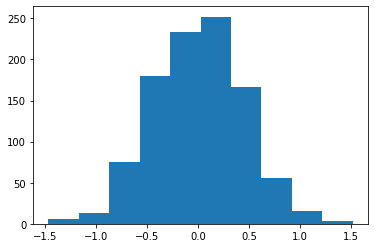

In [5]:
mean_difference = 2.52
all_values = [3, 5, 2, 4, 3, 5, 4, 5, 3, 4, 2, 5, 2, 7, 2, 5, 1, 4, 3, 3, 2, 3, 3, 5, 1, 10, 3, 3, 4, 4, 1, 9, 3, 7, 2, 6, 1, 9, 3, 4, 4, 2, 3, 5, 2, 7, 3, 7, 7, 7, 2, 5, 3, 4, 2, 8, 5, 9, 1, 6, 1, 7, 1, 6, 3, 7, 2, 6, 4, 3, 10, 5, 2, 5, 3, 4, 2, 2, 5, 3, 6, 3, 2, 5, 3, 6, 2, 9, 3, 7, 4, 6, 1, 4, 3, 5, 3, 4, 1, 3]
print(all_values)

mean_differences = []

for permutation in range(1000):
    group_a = []
    group_b = []
    
    for value  in all_values:
        if np.random.rand(1) >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)          

    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    
    mean_differences.append(iteration_mean_difference)
    
    
plt.hist(mean_differences)

By randomly assigning participants to group A or group B, we account for the effect of random chance. Someone in group B who just happened to lose more weight (but not because of the pills) makes the results look better than they were. By creating many permutations, we're able to see all possible configurations of this error. Creating a histogram enables us to see how likely different values of our test statistic are if we repeated our experiment many times.

#### Tabla de frecuencia de mean_differences

In [6]:
sampling_distribution = {}

for mean_difference in mean_differences:
    if sampling_distribution.get(mean_difference, False):
        sampling_distribution[mean_difference] =sampling_distribution.get(mean_difference) + 1
    else:
        sampling_distribution[mean_difference] = 1
    
print(sampling_distribution)

{0.42594859241126093: 3, 0.08000000000000007: 4, 0.2833133253301314: 3, 0.14123376623376593: 4, -0.046474358974359475: 3, 0.20673076923076916: 1, -0.3896940418679553: 2, -0.1968787515006003: 4, -0.6000000000000001: 2, -1.3200000000000003: 1, -0.5234093637454982: 4, 0.16000000000000014: 4, -0.26764585883312986: 1, -0.2799999999999998: 4, 0.4227504244482172: 1, 0.17147707979626503: 1, -0.6298701298701297: 1, 0.24329731892757067: 4, -0.08000000000000007: 5, 0.19391025641025683: 4, -0.053140096618357724: 3, 0.11079887595343241: 2, 0.29064632677639546: 2, -0.3200000000000003: 3, 0.1232492997198884: 1, -0.7971188475390156: 1, 0.0676328502415453: 1, 0.0305098354074671: 5, 0.4299516908212557: 1, 1.3200000000000003: 1, 0.15094339622641506: 4, 0.22626262626262594: 3, -0.049779205138499094: 3, -0.4308445532435736: 1, 0.46060606060606046: 2, -0.6312399355877614: 1, -0.5925331192292247: 1, -0.10505050505050484: 2, -0.0305098354074671: 3, -0.04321728691476601: 4, -0.3599999999999999: 3, 0.4083333333

#### p-value

Con esta distribución muestral de las diferencias entre medias podemos ver el número de veces que aparece 2.52 (el valor de diferencia de medias en el estudio de la pastilla) **o mayor**.

Si dividimos la frecuencia de 2.52 entre 1000 veremos la probabilidad de observar una diferencia de 2.52 o mayor puramente de manera aleatoria. Esta probabilidad es el p-value. Son 1000 porque hemos hecho 1000 permutaciones/simulaciones.

- Si p-value es alto: la diferencia de ambos grupos estudiados podría haber pasado fácilmente de maner aleatoria.

- Si p-value es bajo, indica que la probabilidad de observar ese valor de diferencia por azar es bajo.

Hay que definir un valor umbral de p-value (p value threshold).

- si el valor de p value es menor que el umbral: Se rechaza la hipótesis nula (se rechaza que no hay diferencia entre grupos).

- si el valor de p value es mayor que el umbral: No se rechaza la hipótesis nula (se acepta que no hay diferencia entre grupos)

El valor más típico es 5%.

In [8]:
frequencies = []

for key in sampling_distribution.keys():
    if key >= 2.52:
        frequencies.append(sampling_distribution[key])
        
p_value = np.sum(frequencies) / 1000

print(p_value)

0.0


importante ver que estoy iterando en las keys del diccionario para poder ver su valor >= a 2.52.

- Research design is incredibly important and can lead to inaccurate results. For example, if the participants in group A realized they were given placebo sugar pills, they may modify their behavior and affect the outcome.
- The p value threshold you set can also affect the conclusion you reach.
 - If you set too high of a p value threshold, you may reject the null hypothesis incorrectly. This is known as a type I error.
 - If you set too low of a p value threshold, you may fail to reject the null hypothesis incorrectly. This is known as a type II error.

### Chi Squared Tests

Nos permite encontrar significancia estadística con variables categóricas.

Vamos a trabajar con datos del censo de USA, en el que vamos a ver que puede haber un error en la clasificación de género. Como es difícil corregir este error, vamos a ver si es importante, es decir, si hay diferencia significativa entre los dos grupos.

Un extracto del csv: 

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K

Por ejemplo, queremos ver la diferencia entre valores observados y esperados de número de hombres y mujeres:

|          | Male    | Female  | Total |
|----------|---------|---------|-------|
| Observed | 21790   | 10771   | 32561 |
| Expected | 16280.5 | 16280.5 | 32561 |

Observamos que hay muchos más hombres cuando debería ser el 50%.

Podemos calcular la diferencia porcentual:

$ \text{difference} = \cfrac{observed - expected}{expected} $

Esto te da una desviación porcentual respecto a los datos esperados. Si se calcula para ambos grupos y se suma esta desviación siempre va a salir 0.

Una manera de cuantificar esto sin que salga esto es aplicando la diferencia al cuadrado:

$ \text{difference} = \cfrac{(observed - expected)^2}{expected} $

Los que queremos encontrar es un número que pueda decirnos cuánto se desvían nuestras observaciones de nuestros valores esperados. Esto nos ayuda a averiguar si esta diferencia es estadísticamente relevante.

La suma de estas dos diferencias al cuadrado es el valor **Chi-Cuadrado** (**Chi squared value**) $\chi^2$

In [12]:
female_diff = (10771 - 16280.5)**2 / 16280.5

male_diff = (21790 - 16280.5 )**2 / 16280.5

gender_chisq = male_diff + female_diff

gender_chisq

3728.950615767329

Ahora podemos traducir $\chi^2$ a relevancia estadística mediante una distribución de muestras de de chi-cuadrados.


Un p-valor nos permite determinar si la diferencia entre dos valores se da de debido al azar o por una diferencia real subyacente.

Podemos generar una distribución de muestras de chi-cuadrado utilizando nuestras probabilidades esperadas.

Generamos poblaciones aleatorias de 32561 elementos, vemos el $\chi^2$ de cada una y luego vemos un histograma de estos valores



- Randomly generate 32561 numbers that range from 0-1.
- Based on the expected probabilities, assign Male or Female to each number.
- Compute the observed frequencies of Male and Female.
- Compute the chi-squared value and save it.
- Repeat several times.
- Create a histogram of all the chi-squared values.

Ahora comparando nuestro $\chi^2$con el de la distribución generada aleatoriamente podemos ver qué porcentaje de la generada al azar es mayor que nuestro valor. Con esto obtenemos un p-valor. Si el 5% de los valores son mayores, el p-value es 0.05.


(array([709., 143.,  70.,  37.,  22.,  10.,   6.,   1.,   1.,   1.]),
 array([3.07115875e-05, 1.01542950e+00, 2.03082829e+00, 3.04622708e+00,
        4.06162587e+00, 5.07702466e+00, 6.09242345e+00, 7.10782224e+00,
        8.12322103e+00, 9.13861982e+00, 1.01540186e+01]),
 <a list of 10 Patch objects>)

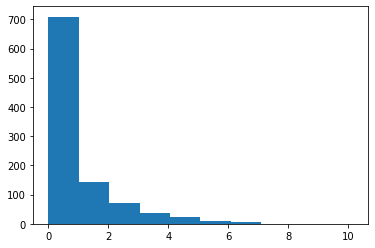

In [11]:
chi_squared_values = []


for generation in range(1000):

    random_population = np.random.random(32561,)
    
    random_population[random_population < 0.5] = 0
    random_population[random_population >= 0.5] = 1
            
    female_count = random_population.sum()
    male_count = len(random_population) - female_count
    
    male_diff = (male_count - 16280.5)**2 / 16280.5 
    female_diff = (female_count - 16280.5)**2 / 16280.5
    chi_squared = male_diff + female_diff
    
    chi_squared_values.append(chi_squared)
    
plt.hist( chi_squared_values)

El valor de nuestros datos es 3728.95, mientras que en nuestra distribucion de muestras aleatorias el mayor valor de $\chi^2$ es 12.

Esto quiere decir que el p-valor es 0, es decir no hay ni un caso en el que el valor sea igual o mayor que el de nuestra muestra real. Es decir, que hay un 100% de probabilidad de que el valor de nuestro caso esté por encima de los de la muestra al azar. "Hay un 0% de probabilidad" de haber obtenido ese valor de manera aleatoria.

Se debería estudiar en consecuencia el método de obtención de los datos.

Al estar al cuadrado, no conocemos la dirección de la significancia estadística. Es importante mirar los datos y conocer cómo están descompensados.

#### Influencia del tamaño de la muestra

Mustras más grandes tendrán $\chi^2$ mayores por el hecho de que los números son mayores, aunque las proporciones sean las mismas.

Si dividimos la muestra entre 100:


In [14]:
female_diff = (107.71 - 162.805)**2 / 162.805

male_diff = (217.9 - 162.805)**2 / 162.805

gender_chisq = female_diff + male_diff
print(gender_chisq)

37.2895061576733


Muestras más grandes a su vez hacen que sea cada vez más difícil que el resultado se desvíe mucho del esperado:


|          | Heads    | Tails  | Total |
|----------|----------|--------|-------|
| Observed |      8   |    2   | 10    |
| Expected |      5   |    5   | 10    |



|          | Heads    | Tails  | Total |
|----------|----------|--------|-------|
| Observed |    800   |  200   | 1000  |
| Expected |    500   |  500   | 1000  |


Es decir, el valor de Chi cuadrado aumenta con el tamaño de la muestras pero **la probabilidad de tener un $\chi^2$ elevado disminuye según aumenta el tamaño de la muestra**.


Estos dos efectos se compensan el uno al otro. Una distribución $\chi^2$ construida con 200 elementos es idéntica a una con muestra de 1000 elementos.

Esto permite comparar cualquier valor $\chi^2$ con una distribución *maestra* para determinar relevancia estadística sin importar el tamaño de la muestra con la que se hizo la $\chi^2$.


(array([661., 185.,  76.,  31.,  23.,  11.,   5.,   2.,   4.,   2.]),
 array([ 0.        ,  1.04533333,  2.09066667,  3.136     ,  4.18133333,
         5.22666667,  6.272     ,  7.31733333,  8.36266667,  9.408     ,
        10.45333333]),
 <a list of 10 Patch objects>)

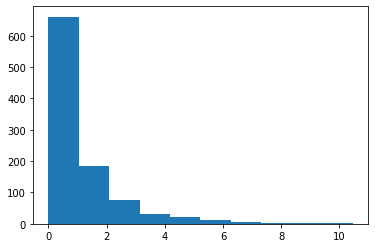

In [16]:
import numpy
chi_squared_values = []

for generation in range(1000):
    random_vector = numpy.random.random(300,)
    
    random_vector[random_vector < 0.5] = 0
    random_vector[random_vector >= 0.5] = 1
    
    female_count = random_vector.sum()
    male_count = len(random_vector)-female_count
    
    male_diff = (male_count - 150)**2 / 150
    female_diff = (female_count - 150)**2 / 150
    
    chi_squared_values.append( male_diff + female_diff)
    
plt.hist(chi_squared_values)


#### Grados de libertad

En estos ejemplos el grado de libertad es 1. Tenemos Males y Females, pero como el tamaño de la muestra es conocido, al saber uno el otro está fijado. Tenemos 2 categorías y un grado de libertad.

Ahora si tenemos 5 categorías:


|          | White   | Black  | Asian | Amer-Indian | Other  | Total |
|----------|---------|--------|-------|-------------|--------|-------|
| Observed | 27816   | 3214   | 1039  | 311         | 271    | 32561 |
| Expected | 26146.5 | 3939.9 | 944.3 | 260.5       | 1269.8 | 32561 |

In [17]:
diffs = []
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

for i, obs in enumerate(observed):
    exp = expected[i]
    diff = (obs - exp) ** 2 / exp
    diffs.append(diff)
    
race_chisq = sum(diffs)

#### Librería SciPy y $\chi^2$

La librería SciPy trae ya una herramienta para calcular a la vez la distribución $\chi^2$ dado dos listas de entrada (observados y esperados).

La salida es una distribución chi y un p-value de los valores observados frente a esa distribución para ver la relevancia estadística.

In [18]:
from scipy.stats import chisquare
import numpy as np

observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

chisquare_value, race_pvalue = chisquare(observed, expected)

### Multi-Category Chi-Square Tests 

Antes hemos calculado valores de chi-cuadrado para frecuencias observadas en una sola categoría (sexo).

Ahora vemos cómo interaccionan dos categorías : sexo e ingresos


|        | Male  | Female | Totals |
|--------|-------|--------|--------|
| >50k   | 6662  | 1179   | 7841   |
| <=50k  | 15128 | 9592   | 24720  |
| Totals | 21790 | 10771  | 32561  |

No se puede ver un patrón que sea evidentemente significativo. Usamos el Chi-squared test of association para ver la relevancia estadística de la correlación entre las columnas. 

#### Encontrando los valores esperados

Para calcular los valores esperados de ingresos y compararlo con los observados lo que podemos hacer es:

Convertir la tabla en proporciones:

|        | Male   | Female  | Totals |
|--------|------- |-------- |--------|
| >50k   | 0.205  | 0.036   | 0.241  |
| <=50k  | 0.465  | 0.294   | 0.759  |
| Totals | 0.67   | 0.33    | 1      |

El 33% es female
El 24.1% gana más de 50k

El valor esperado de female que >50k es 0.33 * 0.241 * 32561 = 2589.6


In [19]:
males_over50k = 0.67 * 0.241 * 32561 

males_under50k = 0.67 * 0.759 * 32561 

females_over50k = 0.33 * 0.241 * 32561 

females_under50k = 0.33 * 0.759 * 32561 

In [20]:
expected = [5257.6, 2589.6, 16558.2, 8155.6]
observed = [6662, 1179, 15128, 9592]
diffs = []
for i, obs in enumerate(observed):
    exp = expected[i]
    diff = (obs - exp) ** 2 / exp
    diffs.append(diff)
    
chisq_gender_income = sum(diffs)

De la misma manera, se puede usar SciPy

In [21]:
import numpy as np
from scipy.stats import chisquare
chisq_value, pvalue_gender_income = chisquare(observed, expected)

#### Crosstab function

Por ejemplo, si ahora queremos comparar otras dos categorías como race y sex, es muy útil la función de pandas crosstab.

Race es una categoría con más de dos posibilidades:

Así podemos ver las frecuencias observadas de un dataset.


In [23]:
import pandas

income = pandas.read_csv('income.csv')

table = pandas.crosstab(income["sex"], [income["high_income"]])
print(table)

high_income   <=50K   >50K
sex                       
 Female        9592   1179
 Male         15128   6662


In [24]:
table = pandas.crosstab(income["sex"], [income["race"]])
print(table)

race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
sex                                                                      
 Female                  119                  346    1555     109    8642
 Male                    192                  693    1569     162   19174


#### Chi2_contingency function

Si tenemos valores observados podemos generar esperados.

Con esta función se puede hacer metiendo como entrada los valores observados y devolviendo squared value, the p-value, the degrees of freedom, y frecuencias esperadas.



In [25]:
import numpy as np
from scipy.stats import chi2_contingency
observed = pandas.crosstab(income['sex'], income['race'])

chisq_value, pvalue_gender_race, df, expected = chi2_contingency(observed)
print(pvalue_gender_race)

5.192061302760456e-97


#### Notas sobre chi cuadrado y la relevancia estadística

Hemos aprendido a averiguar si la asociación entre dos columnas de datos categóricos es estadísticamente relevante o no. Pero es necesario remarcar ciertos matices:

- Que un resultado no sea relevante no significa que no haya asociación entre columnas. Si chi-cuadrado entre dos columnas es 0.1, no significa que no haya una relación entre ellas, sino que no hay una con relevancia estadística.

- Encontrar relevancia estadística no implica nada sobre cómo es la correlación. Significa que hay evidencia de relación entre variables y que hay que investigar más.

- Los test chi-cuadrado solo se pueden aplicar cuando solo se puede pertenecer a una categoría.

- Los test tienen mayor validez cuando los números en cada celda de la cross table son más grandes.

